# Appendix D — Pandas tutorial

The Python library Pandas is a versatile toolbox for working with tabular data.
Pandas is often used for data loading from different sources,
data cleaning, data transformations, statistical analysis,
and many other data management tasks.
This tutorial will introduce you to the central Pandas functionality
with a specific focus on the data manipulation tasks used in statistics.

Click the binder button [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/minireference/noBSstats/HEAD?labpath=tutorials/pandas_tutorial.ipynb)
or this link [`bit.ly/46gBen4`](https://bit.ly/46gBen4)
to play with the tutorial notebook interactively.

<!--  ALT. so you can follow along and try the data loading and transformations commands on your own. -->

<!-- 
which is like a Swiss army knife for data management tasks.

DECISIONS:
- Sept 12: no more use of the custom function `head`
-->

## Pandas overview

The Pandas library is a versatile tool for working with data in Python.
You can think of Pandas as an extension to the Python programming language
that provide specific "helper functions" for data loading and data processing tasks.
Pandas data manipulations are performed on data stored in \emph{data frame} objects,
which provide a consistent interface for doing data transformations and statistical calculations.
A Pandas data frame is roughly equivalent to a spreadsheet
that contains data values organized into rows and columns.
Similar to a spreadsheet,
Pandas provides functions for computing totals, averages, filtering values, etc.
%


% PANDAS2
Most of the text in this section is an introduction to the Pandas library,
which is the Swiss Army knife of data management.
You'll learn how to load CSV data files from the local filesystem (files stored on your computer)
or by downloading them from the web.
You'll also learn about the essential methods available on Pandas data frame objects
for doing statistical calculations like sums, averages, variance, standard deviation, quantiles, etc.
% which are the ``main actors'' in this section are the
% Pandas is a powerful library for doing data manipulation 
The Pandas discussion in this section is a condensed summary focused on the specific commands you need to know
to understand the code examples in the rest of the book.
We leave the in-depth discussion of Pandas library in Appendix~\ref{appendix:pandas_tutorial},
which you can read to go deeper into Pandas functionality.


Becoming good at data management will improve your statistics learning experience
and give you the practical skills you need to apply statistics to real-world scenarios.


there are numerous steps related to data management, data collection, data preprocessing,
and ``librarian'' work like maintaining accurate metadata, archiving, sharing, etc.
Indeed 
that .
The planning, data collection, and data preprocessing consist of the significant part of the work for any statistical analysis.

This is an important realization for anyone who wants to pursue working in data science or statistics.
Most of your day-to-day activities will be about obtaining the data, cleaning it, and re-shaping it into a form you need,
while doing statistical analysis and working with probabilistic models are a small portion of the work.





### Learning objectives



## Notebook setup

Before we begin the tutorial,
we we must take care of some preliminary tasks
to prepare the notebook environment.
Feel free to skip this commands 

#### Installing Pandas and other libraries

We can install Python package `pandas` in the current environment using the `%pip` Jupyter magic command.

In [1]:
%pip install --quiet pandas

Note: you may need to restart the kernel to use updated packages.


We'll use the same command to install some additional Python packages
that we'll need throughout the tutorial.

In [2]:
%pip install --quiet ministats lxml odfpy openpyxl xlrd sqlalchemy

Note: you may need to restart the kernel to use updated packages.


The `ministats` package provides a helper function we'll use to download datasets.
The `lxml`, `odfpy`, `openpyxl`, and `sqlalchemy` provide additional functionality
for loading data stored in various file formats.

#### Setting display options

Next,
we run some commands to configure the display of figures
and number formatting.

In [3]:
# high-resolution figures 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# simplified int and float __repr__
import numpy as np
np.set_printoptions(legacy='1.25')

#### Download datasets

We use a helper function from the `ministats` library
to make sure the `datasets/` folder that accompanies this tutorial is present.

In [5]:
# download datasets/ directory if necessary
from ministats import ensure_datasets
ensure_datasets()

datasets/ directory already exists.


With all these preliminaries in place,
we can now get the Pandas show started!

## Data frames

Most of Pandas functionality is organized around the data frame objects (`DataFrame`),
which are containers for tabular data.
A Pandas data frame is analogous to a spreadsheet:
it provides functionality for storing, viewing, and transforming data
organized into rows and columns.

<!-- Data frames also also provide lots of methods for doing calculations  -->

If you understand how `DataFrame` objects work,
then you'll know most of what you need to know about data management with Pandas,
so this is why we start the tutorial here.


<!-- 
The technical terms we use to describe the Pandas objects and their properties.
\begin{itemize}

	\item	Pandas \emph{data frame} objects (\tt{pd.DataFrame}):
		the software representation of tabular data.
		Data frames are a common way to organize tabular data used in statistical software.
		The Pandas library provides the \texttt{DataFrame} class for representing tabular data.

		% Robyn said:  Do you think people might get mixed up with the definition of data table at the start?
		%			Maybe we should use data frame there too, for simplicity?

	\item	Pandas \emph{series} objects (\tt{pd.Series}):
		the software representation for the rows and columns in a data frame,
		see Figure~\ref{figure:anatomy-of-data-frame}.
		The columns of a data frame correspond to different \emph{variables},
		while the rows are the \emph{observations}.


\end{itemize}
-->

### Crearing a data frame from a CSV file

The most common way to create a data frame object
is to read data from a CSV (Comma-Separated-Values) file.
Let's look at the raw contents of the sample data file `datasets/minimal.csv`.

In [6]:
!cat "datasets/minimal.csv"

x,y,team,level
1.0,2.0,a,3
1.5,1.0,a,2
2.0,1.5,a,1
2.5,2.0,b,3
3.0,1.5,b,3


The first line in the CSV file is called the *header* row
and contains the variables names: `x`, `y`, `team`, and `level`,
separated by commas.
The next five rows contain the data values separated by commas.

The data corresponds to five players in a computer game.
The columns `x` and `y` describe the position of the player,
the variable `team` indicates which team the player is part of,
and the column `level` specifies the character's strength.

We want to load the data file `datasets/minimal.csv` into Pandas.
We start by importing the `pandas` library under the alias `pd`
then call the Pandas function `pd.read_csv()`,
which is used load data from CSV files.

In [7]:
import pandas as pd
df = pd.read_csv("datasets/minimal.csv")
df

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


The import statement makes all the Pandas functions available under the alias `pd`,
which is the standard short-name used for Pandas in the data science community.
On the next line,
the function `pd.read_csv()` reads the contents of the data file `datasets/minimal.csv`
and stores them into a data frame called `df`,
which we then display on the final line.

The data frame `df` is fairly small,
so it makes sense to display it in full.
When working with larger data frames with thousands or millions of rows,
it will not be practical to print all their contents.
We can use the data frame method `.head(k)` 
to prints the first `k` rows the data frame
to see what the data looks like.

In [8]:
df.head(2)

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2


We can also use `df.tail(k)` to print the last $k$ rows of the data frame,
or `df.sample(k)` to select `k` rows at random from the data frame.

### Data frame properties

We'll use the data frame `df` for many of the examples in the remainder of this tutorial,
which is why we gave it a very short name.
Let's explore the attributes and methods of the data frame `df`.
First let's use the Python function `type` to confirm that `df` is indeed a data frame object.

In [9]:
type(df)

pandas.core.frame.DataFrame

The above message tells us that the `df` object
is an instance of the `DataFrame` class.

Every data frame has the attributes `index` and `columns`,
as illustrated in the following figure:

![Anatomy of the data frame `df`.](https://raw.githubusercontent.com/minireference/noBSstats/main/tutorials/src/attachments/anatomy-of-minimal-df.png)
*Figure 1*. The anatomy is the data frame `df` with annotations for its different parts.

#### Rows index

The `index` of the data frame contains unique labels
that we use to refer to the rows of the data frame.
The row-index labels in data frames
are analogous to the row numbers used in spreadsheets.

In [10]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [11]:
list(df.index)

[0, 1, 2, 3, 4]

The data frame `df` uses the "default" range index
that consists of a sequence integer labels: `[0,1,2,3,4]`.
More generally,
index values can be arbitrary labels:
text identifiers, dates, timestamps, etc.

#### Columns index

The columns-index attribute `.columns` tells us the names of the columns (variables) in the data frame.

In [12]:
df.columns

Index(['x', 'y', 'team', 'level'], dtype='object')

These column names were automatically determined based on header row in the CSV file.
Column names usually consist of short textual identifiers for the variable (Python strings).
Spaces and special characters are allowed in column names,
so we could have used names like `"x position"` and `"level (1 to 3)"` if we wanted to.
However,
long column names make data manipulation code more difficult to read,
so they are discouraged.

#### Shape, data types, and momory usage 

Another important property of the data frame is its shape.

In [13]:
df.shape

(5, 4)

The `shape` of the data frame `df` is $5 \times 4$,
which means it has five rows and four columns.

The `.dtypes` (data types) attribute
tells us what `type` of data is stored in each of the columns.

In [14]:
df.dtypes

x        float64
y        float64
team      object
level      int64
dtype: object

We see that the columns `x` and `y` contain floating point numbers,
the column `team` can contain arbitrary Python objects (in this case Python strings),
and the column `level` contains integers.

The method `.info()` provides additional information about the data frame object `df`,
including missing values (null values) and the total memory usage.

In [15]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       5 non-null      float64
 1   y       5 non-null      float64
 2   team    5 non-null      object 
 3   level   5 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 502.0 bytes


The data frame `df` takes up 502 bytes of memory, which is not a lot.
You don't have to worry about memory usage for any of the datasets we'll analyze in this book,
since they are all small- and medium-sized.

<!-- You might have to think about memory usage if you work on larger datasets like logs or databases. -->

### Accessing and selecting values

We use the `.loc[]` attribute to access rows, columns, and individual values within data frames.

#### Accessing individual values

We use the syntax `df.loc[<row>,<col>]`
to select the value with row label `<row>`
and column label `<col>` in the data frame `df`.
For example,
to extract the value of the variable `y`
for the third row, we use:

In [16]:
df.loc[2,"y"]

1.5

Note the row label `2` 
is a particular value within the rows-index `df.index` 
and not the sequential row number:
the row label just happens to be same as the row number in this case.

#### Selecting entire rows

To select rows from a data frame,
we use `df.loc[<row>,:]`,
where `<row>` is the rows-index label
and `:` is shorthand for "all columns."

In [17]:
row2 = df.loc[2,:]
row2

x        2.0
y        1.5
team       a
level      1
Name: 2, dtype: object

The rows of a data frame are Pandas `Series` objects,
which are one-dimensional containers for data values.

In [18]:
type(row2)

pandas.core.series.Series

We'll defer the discussion on `Series` objects until the next section.
For now,
I just want you to know that series have an index property,
which tells you the labels you must use to access the values in the series.
The index of the series `row2` is the same as the columns index of the data frame.

In [19]:
row2.index

Index(['x', 'y', 'team', 'level'], dtype='object')

We can access individual elements using these index labels.

In [20]:
row2["y"]

1.5

In [21]:
ys = df["y"]
ys

0    2.0
1    1.0
2    1.5
3    2.0
4    1.5
Name: y, dtype: float64

The column `ys` is a Pandas series
and its index is the same as the data frame index `df.index = [0,1,2,3,4]`.

In [22]:
ys.index

RangeIndex(start=0, stop=5, step=1)

We can select individual values within the series `ys`
using the index labels.

In [23]:
ys[2]

1.5

The column-selector syntax `df[<col>]`
is shorthand for the expression `df.loc[:,<col>]`,
which means "select all the rows for the column `<col>`."
We can verify that `df["y"]` equals `df.loc[:,"y"]` using the `.equals()` method.

In [24]:
df["y"].equals( df.loc[:,"y"] )

True

#### Selecting multiple columns

We can extract multiple columns from a data frame
by passing a list of column names inside the square brackets.

In [25]:
df[["x", "y"]]

,x,y
0,1.0,2.0
1,1.5,1.0
2,2.0,1.5
3,2.5,2.0
4,3.0,1.5


The result is a new data frame object
that contains only the `x` and `y` columns from the original `df`.


#### Selecting only certain rows

A common task when working with data frames is to select the rows that fit one or more criteria.
We usually carry out this selection procedure in two steps:

-   Build a boolean "selection mask"
    that contains the value `True` for the rows we want to keep,
    and the value `False` for the rows we want to filter out.
-   Select the subset of rows from the data frame using the mask.
    The result is a new data frame
    that contains only the rows that correspond to the `True` values in the selection mask.

For example,
to select the rows from the data frame that are part of team `b`,
we first build the selection mask.

In [26]:
mask = df["team"] == "b"
mask

0    False
1    False
2    False
3     True
4     True
Name: team, dtype: bool

The rows that match the criterion "`team` column equal to `b`"
correspond to the `True` values in the mask,
while the remaining values are `False`.

We can now select the desired subset by placing the mask inside the square brackets.

In [27]:
df[mask]

,x,y,team,level
3,2.5,2.0,b,3
4,3.0,1.5,b,3


The result is a new data frame that contains only the rows that correspond to the `True` values in the `mask` series.

We often combine the two steps we described above
into a single expression `df[df["team"]=="b"]`.
This combined expression is a little hard to read at first,
since it contains two pairs of square brackets and two occurrences of the data frame name `df`,
but you'll get used to it,
since you'll see selection expressions many times.

In [28]:
df[df["team"]=="b"]

,x,y,team,level
3,2.5,2.0,b,3
4,3.0,1.5,b,3


We can use the Python bitwise boolean operators `&` (AND), `|` (OR) and `~` (NOT)
to build selection masks with multiple criteria.
For example,
to select the rows with `team` is `b` where the `x` value is greater or equal to 3,
we would use the following expression.

In [29]:
df[(df["team"] == "b") & (df["x"] >= 3)]

,x,y,team,level
4,3.0,1.5,b,3


The selection mask consists of two terms `(df["team"]=="b")` and `(df["x"]>=3)`
that are combined with the bitwise AND operator `&`.
Note the use of extra parentheses to ensure the masks for the two conditions are computed first before the `&` operation is applied.

If we want to select multiple values of a variable,
we can use the `.isin()` method and specify a list of values to compare with.
For example,
to build a mask that select all the observations that have `level` equal to `2` or `3`,
we can use the following code.

In [30]:
df["level"].isin([2,3])

0     True
1     True
2    False
3     True
4     True
Name: level, dtype: bool

We see the above mask correctly selects all observations except the one at index `2`,
which has `level` equal to `1`.

### Creating data frames from Python objects

We sometimes obtain data in the form of regular Python objects like lists and dictionaries.
If we want to use Pandas functionality to work with this data,
we'll need to "package" it as a `pd.DataFrame` object first.

One way to create a data frame object
is to load a Python dictionary whose keys are the column names,
and whose values are lists of the data in each column.
The code below shows how to create a data frame `df2`
by initializing a `pd.DataFrame` object from a columns dictionary.

In [31]:
dict_of_columns = {
    "x": [1.0, 1.5, 2.0, 2.5, 3.0],
    "y": [2.0, 1.0, 1.5, 2.0, 1.5],
    "team": ["a", "a", "a", "b", "b"],
    "level": [3, 2, 1, 3, 3],
}
df2 = pd.DataFrame(dict_of_columns)
df2

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


The data frame `df2`
is identical to the data frame `df` that we loaded from the CSV file earlier.
We can confirm this by calling the `.equals()` method.

In [32]:
df2.equals(df)

True

We can also create a data frame from a list of observation records.
Each record (row) corresponds to the data of one observation.

In [33]:
list_of_records = [
    [1.0, 2.0, "a", 3],
    [1.5, 1.0, "a", 2],
    [2.0, 1.5, "a", 1],
    [2.5, 2.0, "b", 3],
    [3.0, 1.5, "b", 3],
]
columns = ["x", "y", "team", "level"]
df3 = pd.DataFrame(list_of_records, columns=columns)

When using the list-of-records approach,
Pandas can't determine the names of the columns automatically,
so we pass in the list of column names as the `columns` argument.
The data frame `df3` created from the lists of records 
is identical to the data frame `df` that saw earlier.

In [34]:
df3.equals(df)

True

A third way to create a data frame is to pass in a list of dictionary objects.

In [35]:
list_of_dicts = [
    dict(x=1.0, y=2.0, team="a", level=3),
    dict(x=1.5, y=1.0, team="a", level=2),
    dict(x=2.0, y=1.5, team="a", level=1),
    dict(x=2.5, y=2.0, team="b", level=3),
    dict(x=3.0, y=1.5, team="b", level=3),
]
df4 = pd.DataFrame(list_of_dicts)

Once again,
the data frame `df4` we obtain in this way
is identical to the original `df`.

In [36]:
df4.equals(df)

True

### Exercises

I invite you to try solving the following exercises
before continuing with the rest of the tutorial.

<!-- In this section,
we illustrated the most common data frame manipulation techniques you might need.
but the Pandas library provides a lot more functionality.
If you were able to follow the code examples above
and are able to complete the exercises below,
then you're ready to continue with the rest of the book.
Deep knowledge of Pandas is not required for this book,
but it's super useful skill to develop for working with data in real-world projects. -->

#### Exercise 1: Select a column

Select the column that contains the variable `x` from the data frame `df`.

In [37]:
# Instructions: write your Pandas code in this cell


<a href="https://github.com/minireference/noBSstats/blob/main/tutorials/solutions/pandas/Exercise_1_select-xs-from-df.py" target="_blank">Click for solution.</a>


#### Exercise 2: Select rows

Select the rows from the data frame `df` that correspond to the players on team `a`.

In [39]:
# Instructions: write your Pandas code in this cell


<a href="https://github.com/minireference/noBSstats/blob/main/tutorials/solutions/pandas/Exercise_2_select-rows-from-df.py" target="_blank">Click for solution.</a>


## Series

Pandas `Series` objects are list-like containers of values.
The rows and the and the columns of a data frame are series objects.
Let's extract the column `y` from the data frame `df`
and use it to illustrate the properties of methods of series objects.

In [41]:
ys = df["y"]
ys

0    2.0
1    1.0
2    1.5
3    2.0
4    1.5
Name: y, dtype: float64

The numbers printed on the left are the series `index`.
The numbers printed on the right are the `values` in the series.
The last line shows the series name and the data type of the values.
We can call the `.info()` method on the series `ys`
to display detailed information about it.

In [42]:
ys.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5 entries, 0 to 4
Series name: y
Non-Null Count  Dtype  
--------------  -----  
5 non-null      float64
dtypes: float64(1)
memory usage: 172.0 bytes


### Series properties

The series index tells us the labels we must use to access the values in the series.
The series `ys` has the same index as the data frame `df`.

In [43]:
ys.index

RangeIndex(start=0, stop=5, step=1)

We can access the individual elements of the series
by specifying an index label inside square brackets.
The first element in the series is at index `0`,
so we access it as follows:

In [44]:
ys[0]

2.0

We can select a range of elements from the series
using the slice notation inside the square brackets.

In [45]:
ys[0:3]

0    2.0
1    1.0
2    1.5
Name: y, dtype: float64

The slice notation `0:3` refers to the list of indices `[0,1,2]`.
The result of `ys[0:3]` is a new series
that contains a subset of the original series
that contains the first three elements of `ys`.

The `values` attributes returns all the values stored in the series as a NumPy array.

In [46]:
ys.values

array([2. , 1. , 1.5, 2. , 1.5])

### Series calculations

Series have methods for performing common calculations.
For example,
the method `.count()` counts the number of values in the series.

In [47]:
ys.count()

5

The method `.value_counts()` counts the number of times each value occurs in the series.

In [48]:
ys.value_counts()

y
2.0    2
1.5    2
1.0    1
Name: count, dtype: int64

You can perform arithmetic operations like `+`, `-`, `*`, `/`, `**` with series.
For example,
we can calculate the squared y-value plus 1 for each player
using the following code.

In [49]:
ys**2 + 1

0    5.00
1    2.00
2    3.25
3    5.00
4    3.25
Name: y, dtype: float64

We can also apply arbitrary `numpy` functions to series.
For example,
here is how we can compute the square root of the y-values.

In [50]:
import numpy as np
np.sqrt(ys)

0    1.414214
1    1.000000
2    1.224745
3    1.414214
4    1.224745
Name: y, dtype: float64

The method `.sum()` computes the sum of the values in the series.

<!-- TODO: mention this is the same as SUM(\...) in Excel -->

In [51]:
ys.sum()

8.0

We can calculate the arithmetic mean $\overline{y} = \frac{1}{5}\sum y_i$
of the values in the series `ys` by calling its `.mean()` method.

In [52]:
ys.mean()  # == ys.sum() / ys.count()

1.6

Series have numerous other methods for computing *summary statistics*
like `.min()`, `.max()`, `.median()`, `.std()`, etc.
The following table lists commonly used statistics method available on series.


| Method name | Descriptions | Series | DataFrame |
|---|---|:---:|:---:|
| `count()` | count of non-null values | ✓ | ✓ |
| `mean()` | mean (average) | ✓ | ✓ |
| `median()` | median | ✓ | ✓ |
| `min()` | minimum | ✓ | ✓ |
| `max()` | maximum | ✓ | ✓ |
| `std()` | standard deviation | ✓ | ✓ |
| `var()` | variance | ✓ | ✓ |
| `skew()` | skewness | ✓ | ✓ |
| `kurt()` | kurtosis | ✓ | ✓ |
| `quantile(q)` | quantile function | ✓ | ✓ |
| `mode()` | mode | ✓ | ✓ |
| `sum()` | sum | ✓ | ✓ |
| `prod()` | product | ✓ | ✓ |
| `corr()` | correlation | ✓ | ✓ |
| `cov()` | covariance | ✓ | ✓ |
| `rank()` | ranks | ✓ | ✓ |

The `.quantile(q)` method can be used to compute quartiles (use `q` multiple of 0.25)
and percentiles (use `q` multiple of 0.01).

The same methods are actually available on Pandas `DataFrame` objects.
For example,
we can compute the mean of all the numeric columns in the data frame `df`
by calling its `.mean()` method.

In [53]:
df.mean(numeric_only=True)

x        2.0
y        1.6
level    2.4
dtype: float64

We used the option `numeric_only=True` to avoid computing the mean of the `team` column,
which is not numeric.
The results show the mean of the `x`, `y`, and `level` columns packaged as a Pandas series.

Pandas also provides two methods
that allow us to compute several statistics at once.
Use the `.aggregate(<list>)` method to compute
multiple statistics specified as a list.

In [54]:
ys.aggregate(["count", "sum", "mean"])

count    5.0
sum      8.0
mean     1.6
Name: y, dtype: float64

The method `.describe()` computes a descriptive summary
that consists the standard descriptive statistics including
the mean,
the standard deviation,
and the five-number summary (min, Q1, Q2, Q2, max).

In [55]:
ys.describe()

count    5.00000
mean     1.60000
std      0.41833
min      1.00000
25%      1.50000
50%      1.50000
75%      2.00000
max      2.00000
Name: y, dtype: float64

### Creating Pandas series from Python lists

We sometimes create Pandas `Series` objects from Python lists in order to benefit
all the calculation and aggregation methods available for series objects.
For example,
the code below creates a Pandas series
from a Python list of three numbers then computes their mean,
variance, and standard deviation.

In [56]:
s = pd.Series([5, 10, 15])
s

0     5
1    10
2    15
dtype: int64

In [57]:
s.aggregate(["mean", "var", "std"])

mean    10.0
var     25.0
std      5.0
dtype: float64

## Sorting, grouping, and aggregation


### Sorting and ranking

We can sort the rows of the data frame based on the values of the column `<col>`
by calling the method `.sort_values(<col>)`.
For example,
here is how we can sort the data frame by `df` by the `team` column.

In [58]:
df.sort_values("level")

,x,y,team,level
2,2.0,1.5,a,1
1,1.5,1.0,a,2
0,1.0,2.0,a,3
3,2.5,2.0,b,3
4,3.0,1.5,b,3


The default behaviour of `.sort_values()` is to sort the values in ascending order.
We can use the option `ascending=False` to sort values in descending order.

Note the index in the sorted data frame is now out of order.
since the rows order is now based on the `level` column,
and not based on their index labels.
If we want the re-index the data frame,
we can call the method `.reset_index(drop=True)`.

In [59]:
df.sort_values("level").reset_index(drop=True)

,x,y,team,level
0,2.0,1.5,a,1
1,1.5,1.0,a,2
2,1.0,2.0,a,3
3,2.5,2.0,b,3
4,3.0,1.5,b,3


We can sort by multiple columns using the syntax `.sort_values(["<col1>","<col2>"])`,
which will sort the rows based the values of the column `<col1>` first then by `<col2>`.
For example,
to sort the data frame `df` by `y` then by `x`,
we would use the code `df.sort_values(["y","x"])`.

#### Ranking values

We can obtain the sort-order of values in a data frame
by calling the `.rank()` method.
The *rank* of an element in a series tells us the position it appears in when the list is sorted.
Here is how to obtain the ranks of the `y`-values in the data frame `df`.

In [60]:
df["y"].rank(ascending=True)

0    4.5
1    1.0
2    2.5
3    4.5
4    2.5
Name: y, dtype: float64

This result tells us that value at index `1` is the smallest (first rank in ascending order).
The values at index `2` and `4` are the same,
so we assign the rank `2.5` to both of them (the average between second and third rank).
The last two values are also tied,
so we assign rank `4.5` to both of them.

### Group by and aggregation

A common calculation we need to perform in statistics
is to compare different *groups* of observations,
where the grouping is determined by the values in one of the columns.
The Pandas method `.groupby()` is used for this purpose.
For example,
we can group the observations in the data frame `df` by the value of the `team` variable using the following code.

In [61]:
df.groupby("team")

The result of calling the `.groupby("team")` method is a `DataFrameGroupBy` object
that contains the subsets of the data frame,
which correspond to the different values of the `team` variable.
The `.groupby("mean")` method starts
a parallel computation on the two subsets of rows:
the rows of the players from team `a` (`df[df["team"]=="a"]`)
and rows of the players from team `b` (`df[df["team"]=="b"]`).


We can use the `DataFrameGroupBy` object to do further selection of variables and perform computations.
For example,
to compute the mean value of the `x` variable within the two groups,
we run the following code.

In [62]:
df.groupby("team")["y"].mean()

team
a    1.50
b    1.75
Name: y, dtype: float64

The result is a series containing the mean for the two groups.
The first row contains the value `df[df["team"]=="a"]["y"].mean()`.
The second row's value is `df[df["team"]=="b"]["y"].mean()`.
Note the result is a series indexed by the values of the `team` variable (the team labels `a` and `b`).

We often call the `.aggregate()` method after the `goupyby()` method
to compute multiple statistics for the two groups.
For example,
to compute the count, the sum, and the mean value in each group
we use the following code.

In [63]:
df.groupby("team")["y"].aggregate(["count", "sum", "mean"])

,count,sum,mean
team,,,
a,3,4.5,1.50
b,2,3.5,1.75


The result is a data frame
whose rows correspond to values of the group-by variable `team`,
and whose columns are the statistics we wanted to calculate.

### Sidenote 1: Pandas method chaining

The `groupby` example we saw in the previous section
illustrates the "method chaining" pattern,
which is used often in Pandas calculations.
We can "chain" together any number of Pandas methods
to perform complicated data selection and aggregation operations.

We start with the data frame `df`,
call its `.goupyby()` method,
select the `y` column using the square brackets `["y"]`,
then call the method `.aggregate()` on the result.
This is "chain" includes contains two methods,
but it is common to chain together three or more methods.
This ability to carry out data manipulations using a sequence of simple method applications
is one of the main benefits of using Pandas for data processing.
Method chaining operations work because Pandas `Series`, `DataFrame`,
and `GroupBy` objects all offer the same methods,
so the output of one calculation can be fed into the next.

### Sidenote 2: Line-continuation strategies

When using method chaining,
the command chains tend to become very long
and often don't fit on a single line of input.
We can split Pandas expressions on multiple lines
using the Python line-continuation character `\` (backslash),
as shown in the code example below.

In [64]:
df.groupby("team")["y"] \
  .aggregate(["sum", "count", "mean"])

,sum,count,mean
team,,,
a,4.5,3,1.50
b,3.5,2,1.75


The result of this code cell
is identical to the result we saw above,
however writing the code on two lines using the line-continuation character `\`
makes the operations are easier to read.
It is customary (but not required)
to indent the second line by a few spaces so the dots line up.
The indentation gives a visual appearance of a "bullet list"
of operation we apply to a data frame.

Another way to get the benefits of multi-line commands
is to wrap the entire expression in parentheses.

In [65]:
(df
  .groupby("team")["y"]
  .aggregate(["sum", "count", "mean"])
)

,sum,count,mean
team,,,
a,4.5,3,1.50
b,3.5,2,1.75


The result is identical to the result we obtained earlier.
This works because we're allowed to wrap any Python expression in parentheses without changing its value.
We do this wrapping
because newlines are ignored inside parentheses,
so we're allowed to break the expression onto multiple lines
without the need to add the character `\` at the end of each line.

Don't worry too much about the line-continuation and parentheses tricks for multi-line expressions.
Most of the Pandas expressions you'll see in this tutorial will fit on a single line,
but I wanted to show you some multi-line expressions,
so you won't be wondering what is going on if you see it.

### Counting values

We're often interested in the counts (frequencies)
of different values that occur in a particular column.
The `.value_counts()` can do this counting for us.
For example,
here is how we can count the number of players on each team.

In [66]:
df["team"].value_counts()

team
a    3
b    2
Name: count, dtype: int64

The is sometimes called a one-way table
or a frequency table.

We can also count combinations of values,
which is called a two-way table.
We can obtain a two-way table y calling the Pandas function `pd.crosstab`
and specifying which variable we want to use for the `index`
and which variable we want to use as the `columns` of the resulting table.

In [67]:
pd.crosstab(index=df["team"],
            columns=df["level"])

level,1,2,3
team,,,
a,1,1,1
b,0,0,2


See Section 1.3.4 in the book,
for additional examples of the `pd.crosstab` function,
including different use cases of the options `margin` and `normalize`.

### Using `pivot_table` for aggregation

The `.pivot_table(...)` method produces a spreadsheet-style pivot table
that shows aggregated values, grouped into rows and columns that correspond to categorical columns in the data.
To produce the pivot table must specify:
- `values`: the column to be aggregated
- `aggfunc`: the function used to aggregate the values
- `index`: the variable to group by for the pivot table rows
- `columns`: the variable to group by for the pivot table columns

For example,
the following code produces a pivot table
that display the average `y` coordinates,
for different teams (rows) and different levels (columns).

In [68]:
df.pivot_table(values="y",
               aggfunc="mean",
               index="team",
               columns="level")

level,1,2,3
team,,,
a,1.5,1.0,2.00
b,NaN,NaN,1.75


<a name="Data-transformations"></a>
## Data transformations

Pandas provides dozens of methods for modifying the shape,
the index, the columns, and the data types of data frames.
Below is a list of common data transformations
that you're likely to encounter when  preparing datasets for statistical analysis.

-   **Renaming** the column names of a data frame.
-   **Reshaping and restructuring** the way the data is organized.
-   **Imputation**: filling in missing values based on the surrounding data or a fixed constant.
-   **Merging** data from multiple sources.
-   **Filtering** to select the subset of the data we're interested in.
-   **Splitting up** columns that contain multiple values.
-   **Data cleaning** procedures for identifying and correcting bad data.
    Data cleaning procedures include dealing with missing values, outliers,
    coding errors, duplicate observations, and other inconsistencies in the data.

In this section,
we'll show examples of the most common data frame transformations,
and defer the data cleaning and outlier detection topics until the next section.

### Adding new columns

We can add a new column to a data frame
by assigning data to a new column name as shown below.

In [69]:
df_with_xy = df.copy()
df_with_xy["xy"] = df["x"] * df["y"]
df_with_xy

,x,y,team,level,xy
0,1.0,2.0,a,3,2.0
1,1.5,1.0,a,2,1.5
2,2.0,1.5,a,1,3.0
3,2.5,2.0,b,3,5.0
4,3.0,1.5,b,3,4.5


The first line makes a copy of the data frame `df`
and saves it as a new variable called `df_with_xy`.
The second line computes the product of the `x` and `y` columns from the original `df`
and assigns the result to a new column named `xy` in `df_with_xy`.
We then display the modified data frame `df_with_xy`
to show the presence the additional column.

### Avoiding in-place modifications

The code example above follows best practices for variable naming:
it uses a different variable name for the modified data frame.
The new variable name `df_with_xy`
makes it clear this is a modified data frame
and not the same as the original `df`,
which remains unchanged.
Following this naming convention
makes your code easier to reason about
and avoids many kinds of confusion.
This convention is particularly important in notebook environments,
where code cells can be executed out of order.

Suppose we didn't follow the convention,
and instead added the column `xy` to the original `df`.
In other words,
we're modifying the data frame `df` without changing its name.
In this case,
we would need to keep track of which "version" of `df`
we're working with in each code cell.
In all the earlier code cells,
the data frame `df` had columns `["x", "y", "team", "level"]`,
while later on `df` has columns `["x", "y", "team", "level", "xy"]`.
Keeping track of different "versions" of `df` adds unnecessary cognitive load,
so it's best if we can avoid it:
use different names for different objects!

The good news is that most of the Pandas transformation methods
do not modify data frames,
but instead return a new data frame,
so you don't have to manually do the `.copy()` operation.
You just have to remember to save the transformed version of the data frame as a new variable.

<!--
This in-place modification can lead to confusion,
since they force us to keep track of the history of operations we performed on `df`. -->

### The `assign` method

The `.assign()` method is another way to add new columns to a data frame.

In [70]:
df_with_xy = df.assign(xy = df["x"] * df["y"])

The `.assign()` method returns a new data frame without modifying the original `df`.
We save the result to a new variable `df_with_xy`,
so the end result
is the same as the data frame `df_with_xy`
that we obtained earlier using the copy-then-modify approach.

The `.assign()` method allows us to perform multiple transformations
using method chaining pattern.
The following example shows how we can perform four different transformation
to the data frame `df` in a single statement.

In [71]:
df.assign(xy = df["x"] * df["y"]) \
  .assign(z = 1) \
  .assign(r = np.sqrt(df["x"]**2 + df["y"]**2)) \
  .assign(team = df["team"].str.upper())

,x,y,team,level,xy,z,r
0,1.0,2.0,A,3,2.0,1,2.236068
1,1.5,1.0,A,2,1.5,1,1.802776
2,2.0,1.5,A,1,3.0,1,2.500000
3,2.5,2.0,B,3,5.0,1,3.201562
4,3.0,1.5,B,3,4.5,1,3.354102


The method chain contains four `.assign()` operations.
The effect of the first operation is to add the `xy` column containing the product of `x` and `y` values.
The second operation adds a new constant column `z` equal to `1`.
The third operation adds the column `r`
computed from the formula $r = \sqrt{x^2 + y^2}$,
which is the distance between the point with coordinates $(x,y)$ and the origin.
Note we used the function `np.sqrt` from the NumPy module
to perform the square root operation.
The last assignment operation
transforms the values in the `team` column to uppercase.

<!-- TODO: mention this is why people like Pandas --- compact notation to get A LOT done. -->

### Dropping rows and and columns

Pandas provides several methods for removing rows and columns of a data frame.
For example,
to drop the first (index 0), third (index 2), and fifth (index 4) rows of the data frame `df`
we can use the `.drop()` method and pass in the list of indices to remove as the `index` argument.

In [72]:
df.drop(index=[0,2,4])

,x,y,team,level
1,1.5,1.0,a,2
3,2.5,2.0,b,3


The result is a new data frame
that contains only the second row (index `1`)
and the fourth row (index `3`).

To remove columns from a data frame,
use `.drop()` method with the `columns` option.
Here is the code to delete the column `level`.

In [73]:
df.drop(columns=["level"])

,x,y,team
0,1.0,2.0,a
1,1.5,1.0,a
2,2.0,1.5,a
3,2.5,2.0,b
4,3.0,1.5,b


The result is a new data frame that no longer has the `level` column.
An alternative way to obtain the same result
is to select the three columns
that we want to keep using the code `df[["x", "y", "team"]]`.

Pandas also provides the methods `.dropna()` for removing rows that contain missing values
and `.drop_duplicates()` for removing rows that contain duplicate data.
We'll learn more about these methods in the section on data cleaning later on.

<!-- Other related methods `.dropna()` for removing rows with missing values,
and `.drop_duplicates()` for removing rows that contain duplicate data. -->

### Renaming columns and values

To change the column names of a data frame,
we can use the `.rename()` method and pass in to the `columns` argument
a Python dictionary of the replacements we want to make.
For example,
the code below renames the columns names `team` and `level` to uppercase.

In [74]:
df.rename(columns={"team":"TEAM", "level":"LEVEL"})

,x,y,TEAM,LEVEL
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


The dictionary `{"team":"TEAM", "level":"LEVEL"}` specifies the `old:new` replacement pairs
for the column names.

To rename the values in the data frame,
we can use the `.replace()` method,
passing in a Python dictionary of replacements
that we want to perform on the values in each column.
For example,
here is the code for replacing the values in the `team` column to uppercase letters.

In [75]:
team_mapping = {"a":"A", "b":"B"}
df.replace({"team":team_mapping})

,x,y,team,level
0,1.0,2.0,A,3
1,1.5,1.0,A,2
2,2.0,1.5,A,1
3,2.5,2.0,B,3
4,3.0,1.5,B,3


The dictionary `{"a":"A", "b":"B"}` specifies the `old:new` replacement pairs
specifies the `old:new` replacement pairs for the values.

### Reshaping data frames

One of the most common transformations we need to do with data frames,
is to convert them from "wide" format to "long" format.
Data tables in "wide" format contain multiple observations in each row,
with the column headers conveying some information about the observations in the different columns.
The code example below shows a sample data frame with the viewership numbers for a TV show
organized by season (rows) and by episode (columns).

In [76]:
views_data = {
    "season": ["Season 1", "Season 2"],
    "Episode 1": [1000, 10000],
    "Episode 2": [2000, 20000],
    "Episode 3": [3000, 30000],
}
tvwide = pd.DataFrame(views_data)
tvwide

,season,Episode 1,Episode 2,Episode 3
0,Season 1,1000,2000,3000
1,Season 2,10000,20000,30000


This organizational structure is very commonly used
for data entered manually into in a spreadsheet,
since it's easy for humans to interpret values based on the columns they appear in.
However,
working with datasets complicates data selection, grouping, and filtering operations.
Data scientists and statisticians prefer to work with "long" format datasets,
where each row corresponds to a single observation,
and each column corresponds to a single variable,
like the `minimal` dataset we discussed earlier.

The Pandas operation for converting "wide" data to "long" data is called `melt`,
which is an analogy to melting a wide block of ice into a vertical stream of water.
The method `.melt()` requires several arguments
to specify how to treat each of the columns in the input data frame,
and the names we want to assign to the columns in the output data frame.
Let's look at the code example first,
and explain the arguments after.

In [77]:
tvlong = tvwide.melt(id_vars=["season"],
                     var_name="episode",
                     value_name="views")
tvlong

,season,episode,views
0,Season 1,Episode 1,1000
1,Season 2,Episode 1,10000
2,Season 1,Episode 2,2000
3,Season 2,Episode 2,20000
4,Season 1,Episode 3,3000
5,Season 2,Episode 3,30000


The argument `id_vars` specifies the column that contain identifier variables for each row,
which is the column `season` in the data frame `tvwide`.
All other columns are treated as "value variables"
that identify the properties of all the values in that column.
In the above example,
the values variables are the columns `Episode 1`, `Episode 2`, and `Episode 3`.
The argument `var_name` allows us to choose the name for the variable
that is represented in the different columns,
which we set to the descriptive name `episode`.
Finally,
the `value_name` argument determines name of the value column in the melted data frame,
which we set to `views` since this what the numbers represent.

The result `tvlong` has six rows,
one for each observation in the original data frame `tvwide`.
Each row in `tvlong` corresponds to one episode of the TV show,
and each column corresponds to a different variable for that episode
(the season, the episode, and the number of views).

The rows in the data frame `tvlong`
have are ordered strangely after the melt operation.
It would make more sense
for the all the `Season 1` episodes to appear first,
followed by `Season 2`.
We can fix the sort order
by calling the `.sort_values()` method
and specifying the column names by which we want the data to be sorted.

In [78]:
tvlong.sort_values(by=["season", "episode"]) \
      .reset_index(drop=True)

,season,episode,views
0,Season 1,Episode 1,1000
1,Season 1,Episode 2,2000
2,Season 1,Episode 3,3000
3,Season 2,Episode 1,10000
4,Season 2,Episode 2,20000
5,Season 2,Episode 3,30000


The data is now sorted by season first then by episode,
which is the natural order for this data.
The also called the method `.reset_index()`
to re-index the rows using the sequential numbering
according to the new sort order.

### Tidy data

The concept of *tidy data* is a convention for structuring datasets
that makes them easy to work with.
A tidy dataset has the following characteristics:

  1. Each column contains the values for one variable.
  2. Each row contains the values for one observation.
  3. Each data cell contains a single value.     

The data frame `tvlong` we saw in the previous has all three characteristics:
each column contains a different variable,
each row contains the data for one episode,
and each cell contains one piece of information.
In contrast,
the data frame `tvwide` is not tidy data,
since each row contains the information from three episodes.

An example of a cell that contains multiple values
would be the case where age and gender are stored together,
where the code `32F` would indicate a 32 year old female.
This is not tidy and will complicate all selection and filtering procedures.
It would be preferable to store age and sex as two separate columns,
and put the values `32` and `F` in the corresponding columns.


The *tidy data* convention for organizing datasets
makes it easy to select subsets of the data based on values of different columns,
and perform arbitrary transformations, groupings, and aggregations.
For example,
the data frame `tvlong` allows us filter and group views
based on any combination of the `season` and `episode` variables.

<!-- which are the bread an butter for any statistical analysis -->

Another reason for working with *tidy data*
is that it makes data visualization easier.
We can create advanced Seaborn plots by simply mapping
column names to different attributes of the graphs
like x- and y-positions, colors, sizes, and marker types.
We'll learn more about this in the [Seaborn tutorial](./seaborn_tutorial.ipynb) (Appendix E).

Perhaps the biggest reason behind the popularity of the *tidy data* convention
is that it standardizes the formatting of datasets.
When starting to work on a new tidy dataset,
you don't waste any time trying to understand how the data is structured,
since you know all the variables are in different columns,
and each row corresponds to a different observation.

> "Tidy datasets are all alike, but every messy dataset is messy in its own way." —Hadley Wickham

Indeed,
whenever encountering datasets that are don't have the *tidy data* characteristics,
data scientist will first spend the tidying it up.

### String methods

The `.str` prefix can be used to access other string manipulation methods like
`.str.join()`, `.str.split()`, `.str.startswith()`, `.str.strip()`, etc.
Any operation we can perform on a Python string,
we can also perform the same operation on an entire Pandas series by calling the appropriate `str`-method.


Another transformation we might have to do is to split values that combine multiple variables.
For example,
medical records often contain the age and sex information as a single string `32F`,
which we would split into the variable `age` with value `32`
and the variable `gender` with value `F`.

In [79]:
ppl_df = pd.DataFrame({
    "names":  ["Jane", "John", "Jill", "Jack"],
    "agesex": ["32F",  "20M",  "21F",  "42M"]
})
ppl_df

,names,agesex
0,Jane,32F
1,John,20M
2,Jill,21F
3,Jack,42M


In [80]:
ages = ppl_df["agesex"].str[0:-1]
sexes = ppl_df["agesex"].str[-1]

ppl_df2 = ppl_df.drop(columns=["agesex"])
ppl_df2["age"] = ages
ppl_df2["sex"] = sexes
ppl_df2

,names,age,sex
0,Jane,32,F
1,John,20,M
2,Jill,21,F
3,Jack,42,M


Another way split up 

`.str.extract("(?P<age>\\d*)(?P<sex>[MF])")`

### Merging data frames

TODO

In [81]:
# levels_info table (one row per level)
levels_info = pd.DataFrame({
    "level": [1, 2, 3],
    "life":  [100, 200, 300],
    "power": [10,  20,  30],
})
levels_info

,level,life,power
0,1,100,10
1,2,200,20
2,3,300,30


merge: add life + stength to each row of df by matching on "level"


In [82]:
pd.merge(df, levels_info, on="level")

,x,y,team,level,life,power
0,1.0,2.0,a,3,300,30
1,1.5,1.0,a,2,200,20
2,2.0,1.5,a,1,100,10
3,2.5,2.0,b,3,300,30
4,3.0,1.5,b,3,300,30


In [83]:
df.join

<bound method DataFrame.join of      x    y team  level
0  1.0  2.0    a      3
1  1.5  1.0    a      2
2  2.0  1.5    a      1
3  2.5  2.0    b      3
4  3.0  1.5    b      3>

### Data type conversions

The method `.astype`


In [84]:
df.dtypes

x        float64
y        float64
team      object
level      int64
dtype: object

In [85]:
df["level"].dtype

dtype('int64')

In [86]:
df["level"].astype(np.int8)

0    3
1    2
2    1
3    3
4    3
Name: level, dtype: int8

### Dummy coding of categorical variables


Convert categorical variable into dummy/indicator variables.

Each variable is converted in as many 0/1 variables as there are different
values. Columns in the output are each named after a value; if the input is
a DataFrame, the name of the original variable is prepended to the value.

Parameters
----------
data : array-like, Series, or DataFrame
    Data of which to get dummy indicators.
prefix : str, list of str, or dict of str, default None
    String to append DataFrame column names.
    Pass a list with length equal to the number of columns
    when calling get_dummies on a DataFrame. Alternatively, `prefix`
    can be a dictionary mapping column names to prefixes.
prefix_sep : str, default '_'
    If appending prefix, separator/delimiter to use. Or pass a
    list or dictionary as with `prefix`.
dummy_na : bool, default False
    Add a column to indicate NaNs, if False NaNs are ignored.
columns : list-like, default None
    Column names in the DataFrame to be encoded.
    If `columns` is None then all the columns with
    `object`, `string`, or `category` dtype will be converted.
sparse : bool, default False
    Whether the dummy-encoded columns should be backed by
    a :class:`SparseArray` (True) or a regular NumPy array (False).
drop_first : bool, default False
    Whether to get k-1 dummies out of k categorical levels by removing the
    first level.
dtype : dtype, default bool
    Data type for new columns. Only a single dtype is allowed.


In [87]:
pd.get_dummies(df["team"],
               dtype=int,
               prefix="team")

,team_a,team_b
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


This is called *one-hot encoding*

In [88]:
pd.get_dummies(df["team"],
               dtype=int,
               prefix="team",
               drop_first=True)

,team_b
0,0
1,0
2,0
3,1
4,1


### Transpose

The *transpose* transformation flips a data frame through the diagonal,
turning the rows into columns, and columns into rows.

In [89]:
dfT = df.transpose()
dfT

,0,1,2,3,4
x,1.0,1.5,2.0,2.5,3.0
y,2.0,1.0,1.5,2.0,1.5
team,a,a,a,b,b
level,3,2,1,3,3


After the transpose operation,
the rows index `df.index` becomes the columns index `dfT.columns`,
while the columns index `df.columns`
becomes the rows index `dfT.index`.

I hope the above examples gave you some idea of the transformations
that we can apply to data frames.
Try solving the exercises to practice your new skills.

### Exercises

#### Exercise 3

TODO

#### Exercise 4

TODO

<a name="Data-cleaning"></a>
## Data cleaning

The term *data cleaning* describes the various procedures
that we do to prepare datasets for statistical analysis.
Data cleaning steps include fixing typos and coding errors,
removing duplicate observations, detecting outliers,
and correcting inconsistencies in the data.
These data cleaning steps are essential
for the validity of all the subsequent analysis you might perform on this data.
We need to make sure that the statistical calculations will not "choke" on the data,
or produce erroneous results.

We can conceptualize data cleaning as starting from a "raw" dataset
and transforming it into a "clean" dataset through a sequence
operations like renaming variables, replacing values, changing data types,
dropping duplicates, filtering outliers, etc.
Data cleaning is often the most time consuming part of any data job,
and it is definitely not glamorous work, but you must get used to it.
The only datasets that don't require cleaning are the ones created for educational purposes.
Most real-world datasets you download from the internet or use at work
will needs some cleaning before they can be used.
Luckily,
Pandas provides lots of helper functions that make data cleaning a breeze.

#### Standardize categorical values

A very common problem that occurs for categorical variables
is the use of multiple codes to represent the same concept.
Consider the following series containing what-type-of-pet-is-it data
in which "dog" is encoded using four different labels.

In [90]:
pets = pd.Series(["D", "dog", "Dog", "doggo"])
pets

0        D
1      dog
2      Dog
3    doggo
dtype: object

This type of inconsistent encoding will cause lots of trouble down the line.
For example,
performing a `.groupby()` operation on this variable will result in four different groups,
even though all these pets are dogs.

We can fix this encoding problem by standardizing on a single code for representing dogs
and replacing all other values with the standardized code,
as shown below.

In [91]:
dogsubs = {"D":"dog", "Dog":"dog", "doggo":"dog"}
pets.replace(dogsubs)

0    dog
1    dog
2    dog
3    dog
dtype: object

The method `.value_counts()` is helpful for detecting coding errors and inconsistencies.
Looking at the counts of how many times each value occurs can help us notice exceptional values,
near-duplicates, and other problems with categorical variables.

In [92]:
pets.replace(dogsubs).value_counts()

dog    4
Name: count, dtype: int64

### Exercise 5: cleaning the cats data

Write the code to standardize all the cat labels to be `cat`.

In [93]:
# Instructions: clean the cat labels in the following series
pets2 = pd.Series(["cat", "dog", "Cat", "CAT"])
pets2

0    cat
1    dog
2    Cat
3    CAT
dtype: object

<a href="https://github.com/minireference/noBSstats/blob/main/tutorials/solutions/pandas/Exercise_3_clean-cats.py" target="_blank">Click for solution.</a>


#### Number formatting errors

The text string `"1.2"` corresponds to the number $1.2$ (a `float`).
We can do the conversion from text string to floating point number as follows.

In [95]:
float("1.2")

1.2

When loading data,
Pandas will automatically recognize numerical expression like this and load them into columns of type `float`.

There are some common number formatting problems you need to watch out for.
Many languages use the comma is the decimal separator instead of a decimal point,
so the number 1.2 might be written as the text string `"1,2"`,
which will not be recognized as a `float`.

In [96]:
float("1,2")

ValueError: could not convert string to float: '1,2'

To fix this issue,
we replace the comma character in the string
with a period character as follows.

In [97]:
"1,2".replace(",", ".")

'1.2'

Another example of a problematic numeric value is `"1. 2"`,
which is not a valid float because of the extra space.
We can fix this by getting rid of the space using `"1. 2".replace(" ", "")`.

Let's see how to perform this kind of string manipulations
when working with data stored in a series or a data frame.

In [98]:
rawns = pd.Series(["1.2", "1,3", "1. 4"])
rawns

0     1.2
1     1,3
2    1. 4
dtype: object

The series `rawns` contains strings with correct and incorrect formatting.
Note the series `rawns` has `dtype` (data type) of `object`,
which is what Pandas uses for strings.

Let's try to convert this series to a numeric values (`float`s).
We can do this by calling the method `.astype()` as shown below.

In [99]:
# uncomment to see the ERROR
# rawns.astype(float)

Calling the method `.astype(float)`
is essentially the same as calling `float` on each of the values in the series.
We get an error since the string `"1,3"` is not a valid `float`. 

We can perform the string replacements on the data series `rawns` using the "`str`-methods" as shown below.

In [100]:
rawns.str.replace(",", ".") \
     .str.replace(" ", "") \
     .astype(float)

0    1.2
1    1.3
2    1.4
dtype: float64

After performing the replacements of commas to periods and removing unwanted spaces,
the method `.astype(float)` succeeds.
Note the method we used in the above example is the string method `.str.replace()`
and not general `.replace()` method.

Other types of data that might have format inconsistencies include dates, times, addresses, and postal codes.
We need to watch out when processing these types of data,
and make sure all the data is in a consistent format before starting the statistical analysis.
<!-- Robyn said: Should we go more in-depth on time data? Seems widely applicable and often problematic. -->

### Dealing with missing values

Real-world datasets often suffer from missing values
because of mistakes in the data collection process.
Missing values in Pandas are indicated with the special symbol `NaN` (Not a Number),
or sometimes using the symbol `<NA>` (Not Available).
In Python, the absence of a value corresponds to the value `None`.
The term *null value* is a synonym for missing value.
You can think of `NaN` values as empty slots.

<!-- MAYBE  Some datasets might use special codes like `999` or `-1` to indicate missing integer values. -->

To illustrate some examples of dealing with missing values,
we'll load the dataset located at `datasets/raw/minimal.csv`,
which has several "holes" in it.

In [101]:
rawdf = pd.read_csv("datasets/raw/minimal.csv")
rawdf

,x,y,team,level
0,1.0,2.0,a,3.0
1,1.5,1.0,a,2.0
2,2.0,1.5,a,1.0
3,1.5,1.5,a,NaN
4,2.5,2.0,b,3.0
5,3.0,1.5,b,3.0
6,11.0,NaN,NaN,2.0


The data frame `rawdf` contains the same data we worked on previously
plus additional rows with "problematic" values that we need to deal with.
The missing values are indicated by the `NaN` symbol.
Specifically,
the rows with index `3` is missing the `level` variable,
and row `6` is missing the values for the `y` and `team` variables.

<!-- You can obtain the value `NaN` by writing `float("NaN")`. 

Note the variable `level` has been converted to a `float` data type
in order to use the `NaN` for representing missing values.
This is because integers do not have a natural way to represent missing values.
Some datasets might use special codes like `999` or `-1` to indicate missing integer values.

-->

We can call the `.info()` method
to get an idea of the number of missing values in the data frame.

In [102]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       7 non-null      float64
 1   y       6 non-null      float64
 2   team    6 non-null      object 
 3   level   6 non-null      float64
dtypes: float64(3), object(1)
memory usage: 356.0+ bytes


The data frame has a total of 7 rows,
but the columns `level`, `y`, and `team` have only 6 non-null values,
which tells us these columns contain one missing value each.

We can use the method `.isna()` to get a complete picture of all the values that are missing (not available).

In [103]:
rawdf.isna()

,x,y,team,level
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,True
4,False,False,False,False
5,False,False,False,False
6,False,True,True,False


The locations in the above data frame that contain the value `True`
correspond to the missing values in the data frame `rawdf`.

We can summarize the information about missing values,
by computing the row-sum of the above data frame,
which tells us count of the missing values for each variable.

<!-- TODO: Explain true == 1 and false == 0 -->

In [104]:
rawdf.isna().sum(axis="rows")

x        0
y        1
team     1
level    1
dtype: int64

We can also compute the column-sum to count the number of missing values in each row.

In [105]:
rawdf.isna().sum(axis="columns")

0    0
1    0
2    0
3    1
4    0
5    0
6    2
dtype: int64

The most common way of dealing with missing values is to exclude them from the dataset,
by dropping all rows that contain missing values.
The method `.dropna()` filters out any rows that contain null values
and returns a new "clean" data frame with no `NaN`s.

In [106]:
rawdf.dropna()

,x,y,team,level
0,1.0,2.0,a,3.0
1,1.5,1.0,a,2.0
2,2.0,1.5,a,1.0
4,2.5,2.0,b,3.0
5,3.0,1.5,b,3.0


We can provide various option `subset` to the `.dropna()` method to focus on specific columns.
For example,
to drop only rows that contain null values in the columns `x` or `y`,
we would use the code `rawdf.dropna(subset=["x","y"])`.
Using the `subset` option makes sense if we 
plan analyze only these columns,
and missing values in the other columns will not be a problem.

Another approach for dealing with missing values is to use *imputation*,
which is the process of "filling in" values based on our best guess of what the missing values might have been.
One common approaches for filling in missing numeric values
is to use the mean of the other values in that column.

In [107]:
fill_values = {
    "y": rawdf["y"].mean()
}
rawdf.fillna(value=fill_values)

,x,y,team,level
0,1.0,2.000000,a,3.0
1,1.5,1.000000,a,2.0
2,2.0,1.500000,a,1.0
3,1.5,1.500000,a,NaN
4,2.5,2.000000,b,3.0
5,3.0,1.500000,b,3.0
6,11.0,1.583333,NaN,2.0


Imputation is a tricky process,
since it changes the data,
which can affect the statistical analysis performed on the data.
It would be much better if you go back to the data source
to find what the missing values are,
instead of making arbitrary choice like the mean.

### Identifying and removing outliers

Outliers are data values that are much larger or much smaller than other values.
Sometimes extreme observations can result from mistakes in the data collection process
like measurement instrument malfunctions,
data entry typos, or measurements of the wrong subject.
For example,
if we intend to study the weights of different dog breeds but somehow end up including a grizzly bear in the measurements.
These mistakes are usually identified when a measurement is obviously impossible.
For example,
if your dataset contains the value 600 kg for a dog weight,
then you know this is probably a mistake.

Sometimes we can "correct" outlier values by replacing them with the correct measurement.
For example,
if the data was manually transcribed from a paper notebook,
we could find the original notebook and obtain the correct value.
Other times,
we can't fix the mistake so we drop that observation.
<!-- faulty observations  -->

In any case,
it's important for you to know if your data contains outliers
before you start your statistical analysis on this data,
otherwise the presence of outliers might "break" the statistical inference machinery,
and lead you to biased or erroneous results.


TODO: DGP

<!-- 
-   **Outlier detection and removal** of observations that fall outside the range of expected values.

%	Because outliers can completely change the conclusions you draw from your data,
%	statisticians tend to pay a lot of attention to them.

% A statistic like the median, that's only calculated using one or two values is immune to the effect of outliers.


data point that differs significantly from other observations in a dataset, lying an abnormal distance from the rest of the data. These extreme values can indicate experimental errors, variability in measurement, or novel, valuable insights. They can heavily skew statistical analyses, mean values, and results. 
Key Aspects of Outliers:
Definition: Observations lying outside the overall pattern of a distribution.
Causes: Common causes include data entry errors, measurement errors, or legitimate extreme variations (e.g., a multimillionaire in a survey of average incomes).

TODO: make sure all of these are covered:
Common strategies for handling data problems:
- missing data $\to$ deletion, imputation
- outliers $\to$ clipping, transformation
- and errors $\to$ data cleaning, validation checks


outliers are particular values of a variable that are inconsistent with other observed values.
					% TODO: replace inconsistent with better word to avoid confusion...   e.g. different population 
					Human errors during the data entry process are a frequent cause of outliers.
					For example,
					if a researcher records a patient's weight in pounds instead of kilograms,
					the value of the weight variable for that patient would need to be corrected.
					Outliers can also occur as a result of equipment malfunction.
					% Chelsea said: might want to explain that outliers are data from a different DGP
					% The observations are form a different population from the one we're interested in (hence OK to discard).
					% With this definition in place, can reiterate we shouldn't throw our surprising data (which is meaningful)
					% ALT. 	"outlier" doesn't mean "the data at the edge of your plot",
					%		it means "data that was generated by a different process than the one that you're trying to understand"


-->


Let's look at an example dataset that contains an outlier.
The data sample $\texttt{xs} = [1,2,3,4,5,6,50]$ consists of seven values,
one of which is much much larger than the others.

In [108]:
xs = pd.Series([1, 2, 3, 4, 5, 6, 50], name="x")
xs

0     1
1     2
2     3
3     4
4     5
5     6
6    50
Name: x, dtype: int64

We can clearly see that the value `50` is an outlier in this case,
but the task may not be so easy for larger datasets
with hundreds or thousands of observations.

#### Why outliers are problematic

Outliers can have undue leverage on the value of certain statistics
and may produce misleading analysis results.
Statistics like the mean, variance, and standard deviation
are affected by the presence of outliers.
For example,
let's compute the mean (average value)
and the standard deviation (dispersion from the mean)
of the sample `xs`.

In [109]:
xs.mean(), xs.std()

(10.142857142857142, 17.65812911408012)

These values are very misleading:
they give us the wrong impression about the centre of the data distribution and how spread out it is.
In reality,
the first six values are small numbers,
but the presence of the large outlier $50$
makes the mean and the standard deviation appear much larger.

If we remove the outlier $50$,
the mean of the standard deviation of the remaining values $[1,2,3,4,5,6]$ is much smaller.

In [110]:
xs[0:6].mean(), xs[0:6].std()

(3.5, 1.8708286933869707)

These summary statistics are much more representative of the data.
The mean value $3.5$ is a good single-number description for the "centre" of the data points,
and the standard deviation of $1.87$ also gives us a good idea of the dispersion of the data points.

Any subsequent statistical analyses we might perform with this data
will benefit from these more accurate summary statistics
we calculated after removing the outlier.

<!-- Some statisticians argue that outliers should be excluded even if they aren't mistakes. They reason that because outliers skew results so drastically, those results won't be generalizable. -->

#### Criteria for identifying outliers

We'll now describe some procedures for detecting outliers.
There are several criteria we can use to identify outliers:

- **Visual inspection** is probably the simplest way to detect outliers.
  Simply plot the data as a strip plot or scatter plot,
  and look for values that don't seem to fit with the rest.

- The **Tukey criterion** considers any value that is
  more than 1.5 the interquartile range,
  $\mathbf{IQR} = \mathbf{Q}_3 - \mathbf{Q}_1$,
  away from the outer quartiles of the data to be an outlier.
  This is the criterion we used when drawing Tukey box-plots
  in [Section 1.3](../notebooks/13_descriptive_statistics.ipynb).

- The **$z$-score criterion** allows us to identify values that are very far away from the mean,
  using a multiple of the standard deviation as the measure of distance.

We'll now show how to apply these criteria to the data sample `xs`.

<!-- https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm -->

#### Visual inspection of the data

A strip plot of the data sample `xs`
can help us simply "see" outliers if they are present.
Here is how to use the `stripplot` functions from Seaborn to plot the data.

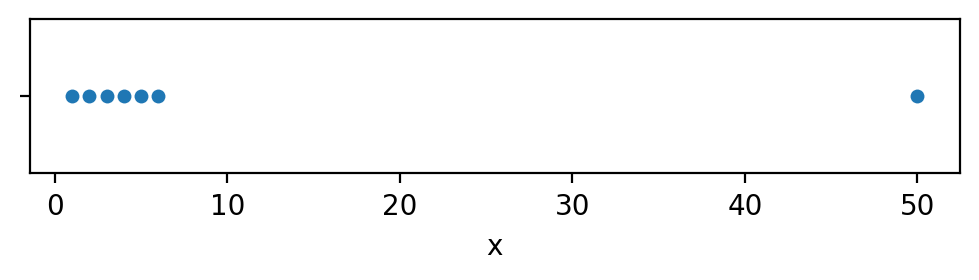

In [111]:
import matplotlib.pylab as plt
import seaborn as sns

plt.figure(figsize=(6,1))
sns.stripplot(x=xs, jitter=0);

In [112]:
# # FIGURES ONLY
# import matplotlib.pylab as plt
# import seaborn as sns
# with plt.rc_context({"figure.figsize":(6,1)}):
#     ax = sns.stripplot(x=xs, jitter=0);
#     ax.set_xlabel(None)

We clearly see one of these is not like the others.

#### Tukey outliers

The *Tukey box plot* is a standard data visualization plot
produced from the quartiles of dataset,
The rectangular "box" goes from $\Q{1}$ to $\Q{3}$.
The width of this box is the interquartile range $\IQR$.
A vertical line is placed in the  $\Q{2}$ (the median).

Additionally,
Tukey box plots have special features for representing outliers.


$[\Q{1} - 1.5 \cdot \IQR, \Q{3} + 1.5 \cdot \IQR]$.
Points outside this interval are outliers and are drawn as separate dots.

The whiskers in the box plot indicate the lowest and highest observations within the interval


\begin{figure}[htb]
    \centering
    \includegraphics[width=0.99\textwidth]{figures/data/descr-stats/boxplot-labelled.pdf}
    \vspace{-2mm}
    \caption{	Box plot for the \texttt{scores} data with additional labels for quantities represented in the plot.
            The left and right boundaries of the box represent the first and third quartiles.
            The vertical line in the middle of the box indicates the median.
            The point on the far-right is called an \emph{outlier}.
            The lines extending from the box are called \emph{whiskers}
            and represent the range of the data excluding outliers.
            The whiskers reach from the smallest and largest values within the interval
            $[\Q{1} - 1.5 \cdot \IQR, \Q{3} + 1.5 \cdot \IQR]$.
            Any observations that fall outside the whiskers are considered outliers and are represented with a dot.}
    \label{fig:boxplot-labelled}
\end{figure}

The box plot shown in Figure~\ref{fig:boxplot-labelled} is called a \emph{Spear--Tukey box plot}
in reference to Mary Eleanor Spear and John Tukey,
who popularized this type of data visualization.
Spear--Tukey box plots give special attention to the display of \emph{outliers},
which are values that are extremely high or low compared to the other data points.
A common criterion to determine if $x$ is an outlier is to check if it satisfies one of the two inequalities
$x < \Q{1} - 1.5 \cdot \IQR$ or $x > \Q{3} + 1.5 \cdot \IQR$.
In words,
$x$ is an outlier if it is further than 1.5 times the interquartile range away from the outer quartiles.

				\item	Box plots (\tt{sns.boxplot}) show the exact position of the quartiles of the distribution,
					and provide a special treatment for the outliers,
					which can be very helpful to discover issues with the data.
					Box plots are better than histograms when used for comparing different distributions.
					One drawback of box plots is their high-level of abstraction---we cannot see the data distribution
					or the number of observations from a box plot,
					but only the information from the \emph{five-number summary}.


We can use the Seaborn function \tt{sns.boxplot} to produce a box plot.

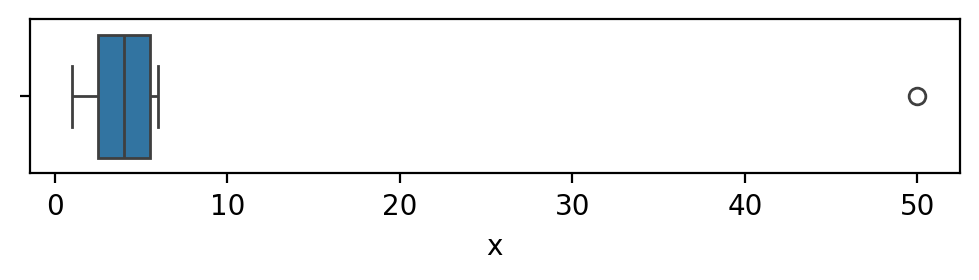

In [113]:
plt.figure(figsize=(6,1))
sns.boxplot(x=xs);

In [114]:
# # FIGURES ONLY
# with plt.rc_context({"figure.figsize":(6,1)}):
#     ax = sns.boxplot(x=xs)
#     ax.set_xlabel(None)

The Tukey boxplot shows an "honest" range of the values that doesn't include outliers.
The right whisker in the above figure is placed at $x=6$ which is the largest non-outlier value in `xs`,
while outliers are displayed as points, like the point at $x=50$.


The whiskers span from the smallest observation that's larger than $\Q{1} - 1.5\cdot \IQR$,
and the largest observation that's still smaller than $\Q{3} + 1.5\cdot \IQR$.
The purpose of the whiskers is to provide an ``honest'' representation of the range of the data.
% Edith said:	I would look for another word for "honest" here,
%			especially if you are going to put quotes around...  The same for non-outlier.
%			Maybe: Whiskers allow us to see the range of the data that fits inside the threshold for being an outlier.
By splitting off the outliers as independent points,
the whiskers show us the non-outlier range of the data.

Let's now reproduce the calculations
that Seaborn performed to produce the box plot.


In [115]:
Q1, Q3 = xs.quantile([0.25, 0.75])
IQR = Q3 - Q1
Q1, Q3, IQR

(2.5, 5.5, 3.0)

In [116]:
xlim_low = Q1 - 1.5*IQR
xlim_high = Q3 + 1.5*IQR
(xlim_low, xlim_high)

(-2.0, 10.0)

The Tukey criteria identifies values outside the interval $[-2,10]$ as outliers.
In words,
values smaller than $-2$ or greater than $10$
are "unusual" for the data sample `xs`.

We can build a mask that selects values that fit the Tukey criteria
by combining the two conditions `xs < -2` and `xs > 10`
using the bitwise OR operator `|`.

In [117]:
tukey_outliers = (xs < -2.0) | (xs > 10.0)
tukey_outliers

0    False
1    False
2    False
3    False
4    False
5    False
6     True
Name: x, dtype: bool

The `tukey_outliers` series
tells us which values in the series `xs` are outliers.
We can use this mask to filter out the outliers,
as we'll show later in this section.

#### Detecting outliers using z-scores

Another way to detect extreme values
is to identify values that are multiple standard deviations away from the mean.
Given the data $[x_1, x_2, \ldots, x_n]$,
we compute the $z$-scores $[z_1, z_2, \ldots, z_n]$,
using the formula $z_i = \frac{x_i - \overline{\texttt{xs}}}{s_{\texttt{xs}}}$,
where $\overline{\texttt{xs}} = \frac{1}{n}\sum_{i=1}^n x_{i} =$ `xs.mean()` is the same mean,
and $s_{\texttt{xs}} = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \overline{\texttt{xs}} )^2 } =$ `xs.std()`
is the sample standard deviation.
The $z$-score $z_i$ of an observation $x_i$
tells you where $x_i$ sits relative to the mean $\overline{\texttt{xs}}$.

In [118]:
xbar = xs.mean()
xstd = xs.std()
zscores = (xs - xbar) / xstd
zscores

0   -0.517770
1   -0.461139
2   -0.404508
3   -0.347877
4   -0.291246
5   -0.234615
6    2.257155
Name: x, dtype: float64

We can identify outliers by their unusually large $z$-scores.
For example,
we could check which values are more than two standard deviations away from the mean,
by selecting $z$-scores that are less than $-2$ or greater than $2$.

In [119]:
zscore_outliers = (zscores < -2) | (zscores > 2)
zscore_outliers

0    False
1    False
2    False
3    False
4    False
5    False
6     True
Name: x, dtype: bool

We see that the $z$-scores method also identifies $50$ as an outlier.

### Removing outliers

We can use the `tukey_outliers` or the `zscore_outliers` criteria
to filter out the outliers.
We'll actually invert the `tukey_outliers` mask
using the Python NOT operator `~`
to obtain a mask for all the values which are *not* outliers,
and use this mask to select only the subset of values that are not outliers.

In [120]:
xs[~tukey_outliers]

0    1
1    2
2    3
3    4
4    5
5    6
Name: x, dtype: int64

We can now continue the statistical analysis
on the subset of the data that doesn't include the problematic outlier.

#### When to exclude outliers

Rejecting observations that are far outside the range of expected values
is the correct thing to do when these observations arise from data entry errors,
but that doesn't mean we should always remove outliers to make our data look "nicer."
We need to have a legitimate reason for removing outliers.

Outliers may indicate an unexpected phenomenon,
or a previously unsuspected variable that influences the measurement.
It would be a shame to just discard a potentially valuable finding.
Instead of rejecting these observations,
you could instead investigate the unusual cases more closely and look for an explanation.
A consultation with a subject-matter expert (SME)
would be a good idea before making the decision to exclude certain observations.

Alternatively,
you could use a statistical procedure that gives less weight to outliers,
or you could repeat the experiment to obtain a new dataset and compare your two sets of results.
Finally,
you could choose to report results both with and without outliers and let your audience decide.

<!-- TODO: mention robust statistics + FWD reference? -->

DGP

If you eliminate data points from your analyses (for any reason),
make sure to report this when reporting your results.

<!--
Whatever strategy you prefer,
it's best to decide how you will deal with outliers *a priori*---before you collect your data.

The goal of certain statistics procedures like *anomaly detection* is precisely to identify outliers,
so you should definitely not remove them.

Outlier in n-dimensions: e.g. an univariate outlier might not be a bi- or multivariate outlier.
-->

### Summary of data cleaning

The data cleaning steps we introduced in this section
are an essential prerequisite for any statistical analysis.
It's important that you learn to perform these basic data manipulations
so that you'll be able to work with messy, real-world datasets.
We've only scratched the surface of what is possible,
but I hope you got an idea of the data cleaning steps you might need to do.

Data pre-processing is not something you can "outsource" or handoff to a colleague,
because it's very informative to "touch" the data and get to know it.
If you only see data after it has been cleaned up by someone else,
then you're missing a lot of the context,
and you were not included in some important decisions,
like dealing with missing values and outliers.
The **Case Studies** section later in this tutorial
shows some hands-on examples of data cleaning.
Here are some exercises that ask you to clean-up
the raw data files in `datasets/raw/`.

### Exercise A

TODO

## Data extraction

Real-world data is stored in all kinds of places,
and an "extraction" step is required to get your hands on this data.

### Data sources

Here are the some common data sources you should know about:

-   **Local files.**
    The simplest kind of data files are the ones stored locally on your machine.
    You can usually tell what type of data is stored in a file
    by looking at the file's *extension*: `.csv`, `.xlsx`, `.json`, etc.

-   **Online files.**
    Files can be made available for download on the internet by placing them on a web server.

-   **Logs.**
    Many software systems generate log files as part of their normal operation.
    For example,
    every web server keeps a log of all the requests it has received,
    which is a very useful data source when working on web analytics.
    <!-- Vanessa's dataset of website visitors was obtained by processing the logs of her web server. TODO: remind reader + pageref -->

-   **Surveys.**
    You can send out a survey and collect the responses from people you're interested in.
    Every startup should be investing time to talk to their customers,
    and surveys can be a part of this conversation.

-   **Databases.**
    Company operational data is stored in one or more databases.
    Access to this data is essential for understanding any business.
    The Structured Query Language (SQL) is the standard interface for accessing data in databases.

-   **Websites.**
    Data is often displayed as tables on various webpages.
    Webpages are usually intended to be read by humans,
    but we can also load load this data into Pandas for analysis.

-   **APIs.**
    An *application programming interface* (API) is a standard way for computers to exchange data.
    Data obtained from APIs is intended for machine use.
    You can think of APIs as websites that allow fine-grained control of the data you're requesting,
    and a well-defined format for the response data.
    <!-- Common data formats used for API responses are JSON and XML. -->
    <!-- TODO mention Getting data from APIs can be done via requests + json processing (examples using github API?) -->

-   **Data repositories.**
    Many researchers make the data from their studies publicly
    available for download through data repositories,
    which are websites specialized for this purpose.
    Examples of data repositories include government data repositories
    and open science repositories like OSF, Zenodo, etc.

-   **Reverse engineering plots and graphs.**
    We can sometimes extract data from graphs in published research papers.
    Tools [`graphreader.com`](https://www.graphreader.com/) can help with this.


### Data formats
<!-- ALT. Data file formats -->

Data files can be encoded in one of several data formats:
CSV files, TSV files, spreadsheets, JSON files, HTML files, SQLite database files, etc.
We'll now show examples of the Pandas code for loading data
from the most common data formats you are likely to encounter "in the wild."

<!-- Pandas provides methods for loading data from many other data file formats.
The function `pd.read_excel()` is used to load data from spreadsheet files.
There are also functions `pd.read_html()` and `pd.read_json()`
for reading data from HTML and JSON files,
which we'll discuss later on. -->

<!-- Robyn said: Move formats to appendix? Consider condensing into a table instead with columns: - snippet of what the data looks like, - name of the format - method to read it in python -->


<!-- CUT SINCE NOT COVERING ALL FORMATS ANYMORE
all of the above source formats.
You can find all the source data files in the `datasets/formats/` directory.
We'll use the function `head` to print the first few lines of the data files so you'll get a feeling for how the data is structured,
then show the appropriate Pandas function for loading data in this format.
The actual data we'll be loading in will be the same in each case,
it's just encoded in a different source format,
but after loading the data into Pandas,
all the different formats will end up as identical data frame objects. -->

#### CSV files

Comma-Separated-Values (CSV) is a widely used file format for tabular data.
CSV files consist of plain text values separated by commas.
The first line of a CSV file usually contains the variable names (it is called the header row).
Comma-Separated-Values files are the most common file format for tabular data that you are likely to encounter.

Let's see the "raw contents" of the data file `datasets/minimal.csv`
as you would see if you opened it with a basic text editor (e.g. Notepad in Windows or TextEdit on a Mac).

```
    x,y,team,level
    1.0,2.0,a,3
    1.5,1.0,a,2
    2.0,1.5,a,1
    2.5,2.0,b,3
    3.0,1.5,b,3
```

The first line of this file contains the column names.
The next five rows contain the actual data for the observations.

<!-- Comma-Separated-Values are the most common format for tabular data.
CSV files are regular text files that contain individual values (numeric or text) separated by commas. In many CSV files, the first line is a special header row that contains the names of the variables. -->

You can load CSV data using the function `pd.read_csv(<path>)`,
where `<path>` is the location of the CSV file.
Recall we used this function in the beginning of this tutorial.
Here is the code for loading a CSV file `datasets/minimal.csv` once more.

In [121]:
df = pd.read_csv("datasets/minimal.csv")
df

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


The function `pd.read_csv()`
accepts many options for specifying alternative separators,
custom headers, quoted values, parsing dates, etc.

#### Spreadsheets files

Spreadsheet software like LibreOffice Calc, Microsoft Excel, and Google Sheets
produce spreadsheet files that have extensions like `.ods`, `.xlsx`, or `.xls`.
We can load data from spreadsheet files using the function `pd.read_excel()`.
For example,
here is how to load the data file `datasets/formats/minimal.ods`,
which was created by LibreOffice Calc.

In [122]:
odsdf = pd.read_excel("datasets/formats/minimal.ods",
                      sheet_name="Sheet1")
assert odsdf.equals(df)

The code for loading Excel files is similar.

In [123]:
xlsxdf = pd.read_excel("datasets/formats/minimal.xlsx", 
                       sheet_name="Sheet1")
xlsdf = pd.read_excel("datasets/formats/minimal.xls", 
                      sheet_name="Sheet1")

Note that reading `.ods` files requires the Python module `odfpy`,
which we `pip`-installed in the beginning of this notebook.
Similarly,
reading the Excel file formats `.xlsx` and `.xls`
requires the Python modules `openpyxl` and `xlrd` to be installed.

#### TSV files

The Tab-Separated-Values format is similar to CSV, but uses TAB characters as separators.
TAB is a special character used for aligning text into columns.
Tabs are represented as `"\t"` in Python strings.
Here is the raw contents of the data file `datasets/formats/minimal.tsv`.

```TSV
x       y       team    level
1.0     2.0     a       3
1.5     1.0     a       2
2.0     1.5     a       1
2.5     2.0     b       3
3.0     1.5     b       3
```

<!-- TODO: say TAB keypress means move-one-colum-to-the-right inside tables (like spreadsheet software) -->

We load TSV files using the function `pd.read_csv`
by passing the value `"\t"` to the `sep` (separator) option,
as shown below.

In [124]:
tsvdf = pd.read_csv("datasets/formats/minimal.tsv",
                    sep="\t")
assert tsvdf.equals(df)

#### JSON files

The JavaScript Object Notation (JSON) format
is a common data format used by many web applications and APIs.
The JSON data format is similar to Python's notation for
`list`s (square brackets `[...]`),
and `dict`s (curly braces `{...}`).
Here are the contents of the data file `datasets/formats/minimal.json`.

```JSON
[
  {"x":1.0, "y":2.0, "team":"a", "level":3},
  {"x":1.5, "y":1.0, "team":"a", "level":2},
  {"x":2.0, "y":1.5, "team":"a", "level":1},
  {"x":2.5, "y":2.0, "team":"b", "level":3},
  {"x":3.0, "y":1.5, "team":"b", "level":3}
]
```

Pandas provides the function `pd.read_json()` for loading JSON data.
If the contents of the JSON file is a list of observation,
we can load JSON files directly into a data frame using the function `pd.read_json()`.

In [125]:
jsondf = pd.read_json("datasets/formats/minimal.json")
assert jsondf.equals(df)

<!-- TODO: plug `pd.json_normalize` https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html via https://towardsdatascience.com/all-pandas-json-normalize-you-should-know-for-flattening-json-13eae1dfb7dd -->

If the JSON source data file has a structure that is more complicated than a list-of-observations,
we can try calling the function `pd.json_normalize`,
which will try to auto-guess the structure of the JSON data.
In the general case,
importing JSON data might require using the Python module `json` to load the data into Python data structures
and carry out processing steps to extract the desired subset of the data you're interested in and organizing it
into the list-of-observation format that Pandas expects.

#### Tables in HTML files

The HyperText Markup Language format is used by all the web pages you access on the web.
The HTML source code of a webpage can include tabular data (the `<table>` tag in the HTML source code).
Here are the first few lines of the HTML file `datasets/formats/minimal.html`.

```html
<table>
  <thead>
    <tr>
      <th>x</th>
      <th>y</th>
      <th>team</th>
      <th>level</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1.0</td>
      <td>2.0</td>
      <td>a</td>
      <td>3</td>
    </tr>
```

We can load the data from HTML files using the function `pd.read_html()`,
which returns a list of data frames extracted from the tables found in a HTML document.

In [126]:
tables = pd.read_html("datasets/formats/minimal.html")
htmldf = tables[0]
htmldf.equals(df)

True

In [127]:
htmldf

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


#### SQLite database files

SQLite is a commonly used data format
for storing databases as files.
Pandas provides the functions `pd.read_sql_table()`
and `pd.read_sql_query()` for extracting data from databases.
We can use these functions to "connect" to the SQLite database file
and read the data stored in one or more database tables in the SQLite database file.

In [128]:
from sqlalchemy import create_engine
dbpath = "datasets/formats/minimal.sqlite"
engine = create_engine("sqlite:///" + dbpath)
with engine.connect() as conn:
    sqldf = pd.read_sql_table("players", con=conn)
    assert sqldf.equals(df)

In [129]:
query = "SELECT x, y, team, level FROM players;"
sqldf2 = pd.read_sql_query(query, con=engine)
assert sqldf2.equals(df)

The key to remember when dealing with various source files,
is that you your goal is to get the data in whatever "shape" it is in,
and save it as a Pandas data frame.
Do not try to restructure or modify the data,
you can do the data transformation and cleaning steps once you have it in the Pandas data frame,
using what we learned in [**Data Transformation**](#Data-transformations)
and the [**Data Cleaning**](#Data-cleaning) sections earlier.

## Case studies

We'll now describe how the datasets used in the book were obtained:
Vanessa's website visitors,
Bob's electricity prices,
and Charlotte's student scores,
as well as the apples, kombucha, doctors, etc.
We were not involved in the data collection process for these datasets,
but it's still worth asking the clients (Vanessa, Bob, Charlotte, etc.)
about the steps they followed to obtain the data.
There is an unspoken rule in statistics
that **the more you know about the data,
the better you'll be able to do the statistical analysis on it**.

<!-- TODO: reference Table of datasetsd for 1.2 -->

The goal of the next ten pages is
to show you examples of real-world data collection and cleanup steps
to showcase the power of Pandas' functions for data management,
and give you an idea of what to expect when you start working on your own datasets.
We'll present the backstory for each dataset as an informal conversation.


Don't be scared by all the technical details!
You don't have to know about server logs, HTML scraping, and web applications to understand this section:
you're just an observer who wants to learn about the extraction and transformation steps.
The goal is to become familiar with the steps that each of your clients performed before providing you the data,
a bit 	like *farm-to-table*, but for data.


### Collecting the apples dataset

Alice's orchard


			Alice runs an apple orchard.
			She collected a sample from the apples harvested this year (the \emph{population})
			and sent you the data in a CSV file called \tt{apples.csv}.
			You start by loading the data into Pandas and looking at its characteristics.

			\begin{codeblock}[load-apples-and-head]
			>>> apples = pd.read_csv("datasets/apples.csv")
			>>> apples.shape
			(30, 1)
			>>> apples.head(3)
			   weight
			0   205.0
			1   182.0
			2   192.0
			\end{codeblock}

			\noindent
			The apples dataset contains $n=30$ observations of the \tt{weight} variable.
			The weights are measured in grams.

			You decide to generate a strip plot (\tt{sns.stripplot}) to visualize the apple weights.

			\begin{codeblock}[stripplot-apples-x-weight]
			>>> sns.stripplot(data=apples, x="weight")
			Result is shown in Figure ¡\ref{fig:apples-stripplot-weight}¡.
			\end{codeblock}

			\begin{figure}[htb]
				\centering
				\includegraphics[width=0.99\textwidth]{figures/data/practice/apples-stripplot-weight.pdf}
				\vspace{-2mm}
				\caption{	Strip plot of the \tt{weight} variable from the apples dataset.}
				\label{fig:apples-stripplot-weight}
			\end{figure}

			\noindent
			You also compute the average weight of the apples in this sample.

			\begin{codeblock}[apples-weight-mean]
			>>> apples['weight'].mean()
			202.6
			\end{codeblock}

			\noindent
			The mean of the apple weights from this sample is $202.6$ grams.

			\paragraph{Alice's estimation question}

				Alice wants to know the average apple weight in the population.
				The sample mean $202.6$\;g 		% \tt{apples['weight'].mean()}
				is an approximation to the population mean, % (denoted $\mu_A$),
				so that is a good place to start.
				But how good is this approximation?
				Alice is asking you to quantify the accuracy of this estimate
				by constructing a \emph{confidence interval} for the population mean,
				which is a range of numbers that includes the plausible values.

				To answer Alice's question,
				we'll learn how to model the \emph{sampling distribution} of the mean (Section~\ref{sec:estimators})
				and construct a \emph{confidence interval} for the population mean (Section~\ref{sec:confidence_intervals}).




Before drawing any conclusion about the average weight of the population (all the apples in this year's harvest),
you need to know how the sample was collected so you decide to ask Alice about that.
Alice says she used \emph{random sampling} approach to collect the sample.
She explains that apples are stored in numbered crates in a warehouse,
and she picked 30 crates at random and selected an apple at random from the selected crates.


Judging from the first three rows,
you suspect the measurement unit is grams.


%	If the average apple weight is within the range of apple weights expected for this sort,
%	then she knows she's doing a good job on the irrigation and general health of the trees.

Alice has sent you the sample of apple weights from this year 

but what is the accuracy of this estimate?
Alice wants you to compute the ``error bars'' for the estimate.
% How accurate of an approximation is estimate $\overline{\mathbf{a}}$ to the unknown population mean $\mu_A$?

% BONUS
% This particular sample has $n=30$ observations, but you can use the probability models to estimate
% the accuracy we would obtain from smaller and larger samples.
%	If Alice thinks the uncertainty in the estimate obtained from the sample of size $n=30$
%	is too large,
%	you'll recommend that she takes a larger sample next year,
%	which will have the effect of reducing the sample standard deviation,
%	and by extension the standard error.



### Collecting the electricity prices dataset

You call Bob to ask him about how he collected the electricity prices dataset `eprices.csv`.
He tells you he obtained the electricity pricing data by scraping the pages from a local price-comparison website.
This website contained the electricity prices for various charging stations in the form of an HTML table.
He used the function `pd.read_html()` to extract the prices
and categorized the stations based on their location in the East and West parts of the city.

<!-- TODO: in notebook, JOIN data from individual stations + prices -->

Listening to the explanations,
you wonder about the possible bias that might exist in the electricity prices that Bob collected,
so you decide to ask him about it.

"Bob, tell me more about this website. Which charging stations are listed there?" you ask.

"It's a volunteer-run effort. People post the price they paid,
so it includes a wide selection of stations.
There were several pages of results,
and each page has 20 prices,
so I think I had the data from most of the stations," he says.

"Ah OK, cool. It seems it's a pretty good sample," you say.
"I was worried it might be a commercial website that only shows the prices from 'preferred' stations."
<!-- Robyn said: Potential issues with the data Repeated measure on the same stations: without accounting for it, people voluntarily posting the price they paid, not selected at random TODO: fix this -->

You're reassured you have a representative sample of the prices,
so you'll be able to study the question
"Which part of the city has cheaper electricity prices?"
since you have the data from a reasonable number of charging stations.

You load up Bob's dataset `datasets/epriceswide.csv`
and print the first few rows to see how the dataset is structured.


<!--

	The website eprices.texas  (or emf.cheap) lists current electricity prices at the "pump" for various charging stations in each city.
	Bob has "scraped" the pricing info from his city over several months.

	Using the Pandas shortcut function for extracting data from HTML pages,
	Bob obtained a prices table for the moment,
	and collected those daily for ten weeks.	
	The ``raw'' data is therefore 70 individual data frames with prices for that day,

	Bob combined the data frames to form one giant sample of prices collected over 10 weeks.
	Bob also augmented the \texttt{eprices} dataset with East and West labels for each charging station
	We're interested in the overall difference between East and West prices
	not interested in the variability between pricing strategies of different charging station.
	Bob is also intentionally choosing to ignore the time when the price samples were taken---we're looking
	for an overall average over the last 10 weeks and ignore any time-dependent trends that may exist.

	The \texttt{eprices.csv} dataset obtained by selecting prices and their side label (East or West).
	

-->

In [130]:
epriceswide = pd.read_csv("datasets/epriceswide.csv")
epriceswide.head()

,East,West
0,7.7,11.8
1,5.9,10.0
2,7.0,11.0
3,4.8,8.6
4,6.3,8.3


It seems Bob stored the data in "wide format,"
with the prices from charging stations in the East in one column,
and the prices from the charging stations in the West in another column.
In other words,
knowing if a given price is in the East or West is encoded in its column position.

We can use the Pandas method `.melt`
to convert the `epriceswide` data frame
from "wide" format into "long" format,
with one observation per row.
We'll use the option `var_name="loc"` to specify the variable name encoded in the column position,
and the option `value_name` to specify the name of the variable stored in the individual cells.

In [131]:
epriceslong = epriceswide.melt(var_name="loc",
                               value_name="price")
epriceslong.head()

,loc,price
0,East,7.7
1,East,5.9
2,East,7.0
3,East,4.8
4,East,6.3


The `.melt` operation transformed the implicit "which column is the data in" information
into an explicit `loc` variable stored in a separate column.
Each row in the transformed data frame contains only a single observation,
so it is in tidy data format.
You save this data to the path `datasets/eprices.csv`,
which is ready for analysis. 

In [132]:
epriceslong.to_csv("datasets/eprices.csv", index=False)

You know how to continue from here.

"Okay Bob. Thanks for the info," you tell ending the conversation.
"I think I have everything I need to do the statistical analysis,
and I'll get back to you soon with the results."

<!-- 

"Cool!
Thanks for agreeing to provide 'stats support' on this.
I'm looking forward to seeing the results."


Do you know what type of statistical analysis you'll use for this dataset?"
he asks.

Bob is asking a really good question.
Depending on the data we have,
there are several types of statistical analysis recipes we can use.
In this case,
we're trying to compare the means of two groups of numerical variables.
In order to describe the variability in the data,
we'll also measure the standard deviation for the two groups.
Based on these statistics computed from the observed data,
we'll be able to make conclusions about the general population (all electricity prices).
Our final goal is to tell Bob conclusively if there is a difference between East and West prices,
and if there is a difference which side of his city has the cheaper prices.

You recently did an analysis of a similar dataset
where you compared the means of two groups,
so you have a clear plan for what you're going to do.

"My plan is to compute the mean and the standard deviation for the East and West prices,
then compare the means to see if there is a difference.
If there is a difference between the means,
I'll run a statistical test to see if the observed difference is statistically significant,"
you explain.

"Wow, sounds complicated!" exclaims Bob,
mystified by the technical jargon.

You reassure him there is nothing too complicated and statistical testing is just a fancy way
to compare means obtained from two groups
and determine if the observed difference in the means could have occurred by chance.
You clearly see he's interested to learn more about how statistical tests work,
but you know this is not the moment to explain everything.
There is a whole book ahead of us for this.

-->


<!-- 
In Chapter 2 we'll learn to use probability theory to model data distributions,
then in Chapter 3 develop tools for estimating parameters from data samples
and using statistical hypothesis testing procedures.
Let's not rush into things.
Easy does it. -->

<!-- TODO: future conversational --- Bob asks why we used the normality assumption, response \"funny you asked this, I also ran the nonparametric Signed Rank test\...\" -->


### Collecting the students dataset

Charlotte is a bit of a techie,
so she set up a learning management system (LMS) server for the students in her class.
Charlotte learned how to do this (run web applications on her own server) after suffering months of difficulties
of trying to upload her teaching materials to the platform provided by her school.
She reasoned that it can't be this hard to run her own server:
it's just documents, video lectures, and exercises,
and there is plenzty of free software that can do this.

Charlotte's main reason for running her own server is because
she didn't feel comfortable with the idea of her students' learning process being monitored by a proprietary learning platform.
You're excited to talk to her,
because it's nice to meet a teacher who cares deeply about student data privacy.

The LMS Charlotte used for this class stores student records in a database.
She made some SQL queries using the function `pd.read_sql_query()`
to obtain detailed logs of each students' actions on the platform.

She then aggregated the total `effort` (total time spend on the platform)
and the combined `score` for each student.
She transported the data as a CSV to her laptop,
then send it to you.

Charlotte automated the whole data extraction process
by writing a script.

In [133]:
query1 = """
SELECT student_id, time_on_task FROM learner_analytics;
SELECT student_id, score FROM student_final_grades;

AGGREGATE total effort
JOIN effort and score tables
"""

TODO: explain script step by step

TODO: merge in
You go through the column names to confirm that you understand the meaning of the categorical variables
and you know how all the numerical variables were calculated.

You wonder how she calculated the `effort` and `score` variables.
She explains she computed the `effort` variable from the total time spent learning,
which includes watching videos and doing exercises.
She computed the `score` variable as the average success rate on all exercises that the student completed.


Using the function `pd.read_csv`,
you can load the `students.csv` dataset and print the first few rows.

In [134]:
students = pd.read_csv("datasets/students.csv", index_col="student_ID")
students.head()

,background,curriculum,effort,score
student_ID,,,,
1,arts,debate,10.96,75.0
2,science,lecture,8.69,75.0
3,arts,debate,8.60,67.0
4,arts,lecture,7.92,70.3
5,science,debate,9.90,76.1


"Okay, thanks Charlotte," you say, "the dataset looks great!"

You hang up the phone feeling very optimistic about the future,
knowing cool teachers like Charlotte exist out there.

<!-- 
Let me just confirm the two questions you're interested in."

"Right. So the first question is whether the curriculum choice (`lecture` vs.`debate`) makes a difference in students `score`s.
And the second question is if students who made more effort in the course got a higher score."

The first question is similar to the electricity prices comparison (comparison between the means in two groups),
so you know exactly how to proceed for this one.
The second question is about a relation between two numerical variables,
which you can study by using linear regression to model how `score` variable increases (or decreases)
for different values of the `effort` variable.

"Thanks for going over all this with me," you say.
"I know exactly how to proceed from here."

"You're welcome, and looking forward to discussing the results with you when they are ready,"
says Charlotte as you say goodbye.

-->

<!-- Charlotte obtained the educational.csv data directly from her school's learning management system (LMS) database (DB). Each student has associated activity logs (time spent learning and solving problems) and a score (final grade) for each course they are enrolled in. Charlotte used WHERE clauses in a structured query language (SQL) query to obtain only the data for the activity logs and final-grade data for the students in her class. -->


### Collecting the kombucha dataset

Khalid measures random samples from different batches ...

Khalid's is not running a scientific study but using statistics for quality control purposes.

### Collecting the doctors dataset

Dan's survey of doctors lifestyle choices ...

Dan is a data analyst working at the Ministry of Health.
His current assignment is to look for ways to improve the health of family doctors.
He collected the doctors dataset (\tt{doctors.csv}),
which contains data about the demographics, life habits, and health metrics
of 224 family doctors that Dan randomly selected from the populations of family doctors in the country.


Dan's doctors dataset is also observational in nature.
He didn't take identical groups of doctors and send them to work in rural and urban settings,
but just observed their location and their sleep scores.

###  Generating the players dataset

The players dataset that we used for the examples in sections 1.1 and 1.2 in the book
is a synthetic dataset,
which means it was artificially generated to have certain properties.

Check out this notebook [`bit.ly/3Z8oco0`](https://bit.ly/3Z8oco0) to view the steps used to generate the dataset.

## Conclusion

I hope this tutorial helped you 

<!-- TODO: better conclusion -->

By learning how to extract, transform, and manage data,
you've established an important foundational knowledge
that you'll be able in science, engineering, and business.
Data management is also a big part of doing statistics.


<!--

The Stack Overflow discussion forums are a good place to ask questions
once you learn the jargon terms for data transformations (`.melt()`, `.groupby()`, `.agg()`, etc.).


The main takeaway is that \emph{data munging} skills are very useful to develop
for anyone who plans to do work with data in the future.
The examples in this section illustrated some of the most common data processing tasks,
but there are all kinds of other transformations you might need to perform,
depending on the datasets you're working with.

It doesn't make sense to learn all possible data transformations,
but instead learn what you need to know when you need it.
See the Pandas tutorial (Appendix~\ref{appendix:pandas_tutorial})
to learn more tricks and techniques for working different data formats, data cleaning, and dealing with missing values.



The data loading steps we introduced in this section are an essential prerequisite for statistical analysis.
It's important that you learn to perform the basic data manipulations
so that you'll be able to load datasets and select the data you need for your study. 
-->

## Problems

- Data transformations: `melt`, `dropna`, filter by value, etc.

- Rename categorical values to normalize them. `OH` (Ohio), `WA` (Washington), etc.

- Use `groupby` to compute the average $y$-position for the players in the two teams.  
  
- `str` methods: split City, ST -- into city and state (or Last Name, First name into separate names)

- Filter out outliers using pre-specified cutoff (Q3 + 1.5IQR) but don't tell how limits were computed (FWD refs to Descr. Stats and Z-score).


## Links

I've compiled a list of Pandas learning resources for you.


### Music videos

- https://www.youtube.com/watch?v=4NJlUribp3c


### General concepts

- https://en.wikipedia.org/wiki/Data_wrangling

- https://en.wikipedia.org/wiki/Data_preparation




### Cheatsheets

- https://homepage.univie.ac.at/michael.blaschek/media/Cheatsheet_pandas.pdf

- Data Wrangling with pandas Cheat Sheet
  https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
  
- Pandas Basics from the Python For Data Science Cheat Sheet collection   
  https://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3  
  see also https://www.datacamp.com/blog/pandas-cheat-sheet-for-data-science-in-python

- The `pandas` DataFrame Object  
  https://www.webpages.uidaho.edu/~stevel/cheatsheets/Pandas%20DataFrame%20Notes_12pages.pdf





### Tutorials

- Getting started with pandas tutorial  
  https://www.efavdb.com/pandas-tips-and-tricks

- Making head and tails of Pandas  
  https://www.youtube.com/watch?v=otCriSKVV_8
  https://github.com/tomaugspurger/pydataseattle

- Essential basic functionality (very good)  
  https://pandas.pydata.org/docs/user_guide/basics.html

- The 10 minutes to Pandas tutorial  
  https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html 

- Effective Pandas tutorial by Matt Harrison
  (Use appropriate data types to save memory. Lots of examples of method chaining.)  
  https://www.youtube.com/watch?v=zgbUk90aQ6A&t=526s

- Overview of Pandas data frame operations  
  https://devopedia.org/pandas-dataframe-operations

- Nice examople dataframe with variety of data types + compact reference of all operations  
  https://dataframes.juliadata.org/stable/man/comparisons/#Comparison-with-the-Python-package-pandas  
  see also https://github.com/bkamins/Julia-DataFrames-Tutorial/

- Pandas: Python Data Analysis Library  
  https://johnfoster.pge.utexas.edu/numerical-methods-book/ScientificPython_Pandas.html  
  See also [notebook](https://github.com/johnfoster-pge-utexas/numerical-methods-book/blob/master/content/ScientificPython_Pandas.ipynb)
  and [src](https://github.com/johnfoster-pge-utexas/numerical-methods-book/tree/master/content).

- Pandas sections from *Python Data Science Handbook*
  https://www.one-tab.com/page/OaSZriUtRg6wb7mppbamag  
  via https://jakevdp.github.io/PythonDataScienceHandbook/

- Pandas tutorials -- lots of details  
  https://www.one-tab.com/page/Iw-cytCuTe-FiNZ7F1nrww

- Tutorial notebooks from DataCamp  
  https://trenton3983.github.io/files/projects/2019-01-24_pandas_dataframes/2019-01-24_pandas_dataframes.html  
  https://trenton3983.github.io/files/projects/2019-02-04_manipulating_dataframes_with_pandas/2019-02-04_manipulating_dataframes_with_pandas.html

- Lots of simple tasks  
  https://nbviewer.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb



### Data cleaning

- Tidying Data tutorial by Daniel Chen (Lots of examples of melt operations on real-world datasets)  
  https://www.youtube.com/watch?v=iYie42M1ZyU
  https://github.com/chendaniely/pydatadc_2018-tidy/blob/master/notebooks/tidy.ipynb

- Data Cleaning lab from Applied & Computational Mathematics Emphasis (ACME) course  
  https://acme.byu.edu/0000017c-ccff-da17-a5fd-cdff03570000/acmefiles-09-datacleaning-2021-pdf  
  See more [materials here](https://acme.byu.edu/2021-2022-materials).

- https://github.com/hxchua/datadoubleconfirm/blob/master/EuroPython/DataCleaning.ipynb

- Visualizations of Pandas operations (click on examples)
  https://pandastutor.com/vis.html

- A talk on data cleaning principles by Karl Broman
  https://www.youtube.com/watch?v=7Ma8WIDinDc  
  slides https://kbroman.org/Talk_DataCleaning/data_cleaning.pdf

- https://datascienceinpractice.github.io/tutorials/06-DataWrangling.html

- https://datascienceinpractice.github.io/tutorials/07-DataCleaning.html

- https://www.mariakhalusova.com/posts/2019-01-31-cleaning-data-with-pandas/


<!--
COMMAND LINE CLEANUP
http://mchap.io/using-foia-data-and-unix-to-halve-major-source-of-parking-tickets.html
via https://news.ycombinator.com/item?id=17754105
-->




### Articles

- *pandas: a Foundational Python Library for Data Analysis and Statistics* by Wes McKinney  
  https://www.dlr.de/sc/Portaldata/15/Resources/dokumente/pyhpc2011/submissions/pyhpc2011_submission_9.pdf

- More Pandas articles and links  
  https://www.one-tab.com/page/-EZFbibXRq2xZRYM9iUVDg

- Good tips about `loc` vs. `[]`  
  https://stackoverflow.com/a/48411543/127114

- Devoperia articles on Pandas:  
  [data frame operations](https://devopedia.org/pandas-dataframe-operations)  
  [data structures](https://devopedia.org/pandas-data-structures)  
  [data preparation](https://devopedia.org/data-preparation)





### Books

- https://store.metasnake.com/effective-pandas-book







<!--

TODO import links from gdoc

### R learning resources

- https://www.one-tab.com/page/4P1d6YLhQKm1FthXB4qRzg
- https://remkoduursma.github.io/learningguidetor/dataskills1.html
- https://remkoduursma.github.io/learningguidetor/dataskills2.html		

#### Tidy data in R
- https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
- https://datasciencebook.ca/wrangling.html
- https://moderndive.com/3-wrangling.html 
- https://github.com/jennybc/lotr-tidy/


-->


